# Loan Default Prediction

# Overview
Loan default prediction is a crucial task for financial institutions to assess credit risk and minimize losses. This project aims to develop a machine learning model to predict the likelihood of a borrower defaulting on a loan, which is crucial for banks and financial institutions as it enables proactive risk management, reduces financial losses, and improves lending policies. The target audience includes banks and financial institutions, credit risk analysts, regulatory bodies, and fintech companies. The model can reduce bad debt and loan write-offs, improve lending policies by identifying high-risk applicants, and enhance customer profiling, leading to personalized lending solutions.

# Business Understanding
In Kenya's evolving financial sector, both lenders and borrowers have considerable obstacles. Challenges encountered by lenders include elevated default rates, political and economic volatility, and corruption.

Borrowers face challenges include limited access to credit, high and variable interest rates, rigorous loan qualification criteria, and cultural and societal barriers, particularly impacting women.

Loan default constitutes a substantial challenge within Kenya's financial sector, impacting the profitability and sustainability of lending institutions. The execution of governmental initiatives like the Hustler Fund underscores the necessity of addressing this issue. Launched in late 2022, the Hustler Fund aimed to provide accessible credit to Kenyan residents, offering loans at an annual interest rate of 8%. As of August 2023, more than 29% of the outstanding loan portfolio was classified as at-risk, with nearly 3 billion shillings in defaults, indicating a default rate nearly twice that of commercial banks.

# Data Understanding

The dataset comprises multiple sources:

**Application Data:**
* **Application_ID**: Unique Application Number
* **Application_Date**: Date of application
* **Loan_Approval_Status**: Approval status of loan
* **Age_at_Application**: Age in Years at point of application
* **Marital_Status**: Marital status at point of application
* **Gender**: Sex
* **Own_Rent_Home**: Residential status of home ownership
* **Occupation_Professional_Category**: Proffessional Category
* **Type_of_Business_Industry_of_Employment**: Industry of Employment
* **Employment_Status**: Employment status
* **Time_at_Current_Employment_(Months)**: Time at current employment in months
* **Time_Employed_with_Previous_Employer_(Months)**: Time at previous employment in months
* **Number_of_Dependents**: Number of dependents
* **Loan_Purpose**: Purpose of Loan Applied
* **Monthly_Income**: Monthly Income in KES
* **Government_Employee**: Flag if government employee

**Contracts Data:**
* **Contract_ID**:	Loan Account Number
* **Application_ID**	Application Number related to the loan opened
* **Key**:	Number of Open Contracts related to the loan application Number
* **Loan_Type**:	Type of loan facility
* **Contract_Start_Date**:	Date of start for Loan facility
* **Expected_Contract_End_Date**:	Expected date of loan maturity
* **Actual_Contract_End_Date**:	Actual date when the contrcat was closed
* **Loan_Term**:	Tenure of loan in months
* **Total_Loan_Amount**:	Loan amount approved

**Contracts Snapshop data:**
* **Contract Id**:	Loan Account Number*
* **Snapshot Date**:	The End of Month when the data was reported
* **Outstanding Amount**:	The outstanding balance as at the reporting date
* **Due Amount**:	The amount unpaid as at the reporting date
* **Number of Days Past Due**:	The number of days past due as at that reporting date
* **Contract Status**:	The status of the contract

**CRB Data:**
* **Application_ID**:	Application Number related to the loan opened
* **Application_Date**:	Date of application
* **CRB Score**:	Credit Bureau Risk Score
* **CRB Grade**:	Credit Bureau Risk Grade

**Current and Savings Account Data:**
* **Account Number**:	Application Number related to the loan opened
* **Application ID**:	Application Number related to the loan opened
* **Month (YYYY-MM)**:	The reporting month when the data was calculated
* **Open Date**:	The date when the account was openned
* **Closed Date**:	The date when the account was closed
* **Average Balance**:	The monthly average balance
* **Overdraft Limit**:	Overdraft Limit
* **Number of Days in Debit during Month**:	Number of Days in Debit during Month
* **Number of Days in Credit during Month**: Number of Days in Credit during Month
* **Maximum End of Day Balance**:	Maximum End of Day Balance
* **Minimum End of Day Balance**:	Minimum End of Day Balance
* **Sum of Monthly Debit Transactions**: Sum of Monthly Debit Transactions
* **Sum of Monthly Credit Transactions**:	Sum of Monthly Credit Transactions
* **Last Transaction Date**:	Last Transaction Date
* **Sum of ATM Deposits**:	Sum of ATM Deposits
* **Number of ATM Deposits**:	Number of ATM Deposits
* **Sum of ATM Withdrawals**:	Sum of ATM Withdrawals
* **Number of ATM Withdrawals**:	Number of ATM Withdrawals
* **Sum of Cheque Debit Transactions**:	Sum of Cheque Debit Transactions
* **Number of Cheque Debit Transactions**:	Number of Cheque Debit Transactions
* **Sum of Bounced Cheque transactions**:	Sum of Bounced Cheque transactions
* **Number of Bounced Cheques**:	Number of Bounced Cheques
* **Sum of Debit Card POS Transactions**:	Sum of Debit Card POS Transactions
* **Number of Debit Card POS Transactions**:	Number of Debit Card POS Transactions
* **Sum of Over the Counter Withdrawals**:	Sum of Over the Counter Withdrawals
* **Number of Over the Counter withdrawals**:	Number of Over the Counter withdrawals
* **Account Type**:	Type of account
* **Account Status**:	Latest status of the account
* **Number of Joint Holders**:	Number of Persons owning the account
* **SnapshotMonth**:	The reporting month when the data was calculated

![image.png](.\images\erpdiagram.png)

In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Application Dataset

In [2]:
# Loading the relevant libraries

# Data pre-processsing libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import itertools

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics libraries
from scipy.stats import chi2_contingency
from sklearn.metrics import  f1_score, roc_auc_score,precision_recall_curve,\
    accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, recall_score
from sklearn.decomposition import PCA

# Data modeling libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb


In [3]:
# Loading the dataset

file_path = "/content/drive/MyDrive/CRB_Data"
# Load data
app_data = pd.read_csv(file_path + "/1. ApplicationData.csv")
#file_path +
# Check 2 top rows
app_data.head(2)

,Application_ID,Application_Date,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Time_Employed_with_Previous_Employer_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income,Government_Employee
0,C302100001,9/15/2015,Approved,39.0,Unmarried,Female,Own,NaN,Other,Full-Time,6.0,NaN,2.0,Home Improvement,1500.59,NaN
1,C302100002,8/31/2015,Approved,29.0,Unmarried,Female,Family,NaN,NaN,Full-Time,25.0,NaN,0.0,Debt Consolidation,3769.36,NaN


In [4]:
# Get data summary
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Application_ID                                 9492 non-null   object 
 1   Application_Date                               9492 non-null   object 
 2   Loan_Approval_Status                           9354 non-null   object 
 3   Age_at_Application                             9471 non-null   float64
 4   Marital_Status                                 7712 non-null   object 
 5   Gender                                         9488 non-null   object 
 6   Own_Rent_Home                                  8188 non-null   object 
 7   Occupation_Professional_Category               9361 non-null   object 
 8   Type_of_Business_Industry_of_Employment        7210 non-null   object 
 9   Employment_Status                              9357 

In [5]:
# Check Shape
app_data.shape

(9492, 16)

In [6]:
# Check null values
app_data.isnull().sum()

,0
Application_ID,0
Application_Date,0
Loan_Approval_Status,138
Age_at_Application,21
Marital_Status,1780
Gender,4
Own_Rent_Home,1304
Occupation_Professional_Category,131
Type_of_Business_Industry_of_Employment,2282
Employment_Status,135


*Observation*

* The ApplicationData has $9,492$ records under $16$ columns.
* All the columns have null values apart from the *'Application_ID'*, *'Application_Date'*, and *'Monthly_Income'* columns.
* The 'Application_Date' column is  an object dtype. thiss needs to be changed to 'date' datatype

### Contracts Data

In [7]:
# Load data
contract_data = pd.read_csv(file_path + "/2. ContractsData.csv")

# Check 2 top rows
contract_data.head(2)

,Contract_ID,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount
0,CONT100001,C302103426,1,Unsecured Personal Loan,4/12/2018,4/12/2023,NaN,60 - Month(s),24529.89
1,CONT100002,C302103426,2,Unsecured Personal Loan,4/12/2018,4/12/2023,NaN,60 - Month(s),35085.79


In [8]:
# show data summary
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract_ID                 9374 non-null   object 
 1   Application_ID              7598 non-null   object 
 2   Key                         9374 non-null   int64  
 3   Loan_Type                   9374 non-null   object 
 4   Contract_Start_Date         9374 non-null   object 
 5   Expected_Contract_End_Date  9374 non-null   object 
 6   Actual_Contract_End_Date    2593 non-null   object 
 7   Loan_Term                   9374 non-null   object 
 8   Total_Loan_Amount           9374 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 659.2+ KB


In [9]:
# Check shape
contract_data.shape

(9374, 9)

In [10]:
# Check null values
contract_data.isnull().sum()

,0
Contract_ID,0
Application_ID,1776
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,6781
Loan_Term,0
Total_Loan_Amount,0


*Observation*
* The contract data is of $9$ columns with $9,374$ records
* The dates are in the object dtype, will need to be changed to date format
* The contracts data has null values on the *'Application_ID'* and *'Actual_Contract_End_Date'* columns.


### Contracts Snapshot data

In [11]:
# Load the dataset
contractsSnapshot_data = pd.read_csv(file_path + "/3. ContractsSnapshotData.csv")

# Check top 2 rows
contractsSnapshot_data.head(2)

,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
0,CONT109375,12/31/2018,0.00,0.0,NaN,Closed
1,CONT109376,8/31/2006,215.08,0.0,NaN,Active


In [12]:
# Check Data size
contractsSnapshot_data.shape

(274371, 6)

In [13]:
# Data summary
contractsSnapshot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274371 entries, 0 to 274370
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Contract_ID              274371 non-null  object 
 1   Snapshot Date            274371 non-null  object 
 2   Outstanding Amount       274371 non-null  float64
 3   Due Amount               274371 non-null  float64
 4   Number of Days Past Due  79158 non-null   float64
 5   Contract Status          274371 non-null  object 
dtypes: float64(3), object(3)
memory usage: 12.6+ MB


In [14]:
# Check null values
contractsSnapshot_data.isnull().sum()

,0
Contract_ID,0
Snapshot Date,0
Outstanding Amount,0
Due Amount,0
Number of Days Past Due,195213
Contract Status,0


*Observation*
* Tha contractsSnapshot data has $6$ columns with $274,371$ rows.
* the date column is of object dtype. Will be changed to date dtype
* It has null values on the *'Number of Days Past Due'* column. On further checking, the null values are present on records that do not have *'Due Amount'*.

### CRB Data

In [15]:
# Load data
crb_data = pd.read_csv(file_path + "/4. CRB Data.csv")

# Check top 2 rows
crb_data.head(2)

,Application_ID,Application_Date,CRB Score,CRB Grade
0,C302102137,9/30/2017,593,D
1,C302106175,9/30/2017,625,C


In [16]:
# Data summary
crb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    6750 non-null   object
 1   Application_Date  6750 non-null   object
 2   CRB Score         6750 non-null   int64 
 3   CRB Grade         6750 non-null   object
dtypes: int64(1), object(3)
memory usage: 211.1+ KB


In [17]:
# Check null values
crb_data.isnull().sum()

,0
Application_ID,0
Application_Date,0
CRB Score,0
CRB Grade,0


In [18]:
# Check size
crb_data.shape

(6750, 4)

*Observation*
* CRB Data has $4$ columns with $6,750$ records.
* The CRB Data has no null values.
* The *'Application_Date'* column is of object dtype, to be changed to date dtype.

### Current_and_Savings Data

In [19]:
# load data
curr_savings_data = pd.read_csv(file_path + "/5. Current and Savings Account Data.csv")

# Check top 2 rows
curr_savings_data.head(2)

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,1,ACC10000001,C302100001,2015-09-01,2015-09-06,NaN,1986.09,0.0,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,2015-09-01
1,2,ACC10000002,C302100001,2015-09-01,2015-09-06,2018-10-04,23.45,NaN,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-09-01


In [20]:
# Dataset summary
curr_savings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857677 entries, 0 to 857676
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      857677 non-null  int64  
 1   Account_Number                          857677 non-null  object 
 2   Application ID                          857672 non-null  object 
 3   Month (YYYY-MM)                         857647 non-null  object 
 4   Open Date                               857647 non-null  object 
 5   Closed Date                             161748 non-null  object 
 6   Average Balance                         857647 non-null  float64
 7   Overdraft Limit                         753484 non-null  float64
 8   Number of Days in Debit during Month    857647 non-null  float64
 9   Number of Days in Credit during Month   857647 non-null  float64
 10  Maximum End of Day Balance              8576

In [21]:
# Check size
curr_savings_data.shape

(857677, 31)

In [22]:
# Check null values
curr_savings_data.isnull().sum().sort_values()

,0
ID,0
Account_Number,0
Application ID,5
Month (YYYY-MM),30
Open Date,30
Average Balance,30
Number of Days in Credit during Month,30
Number of Days in Debit during Month,30
Maximum End of Day Balance,30
Minimum End of Day Balance,30


*Observation*
* The Current & Savings data has $31$ columns with $857,677$ records
* This data has null values on all the columns apart from the *'ID'* and *'Account_Number'* columns
* The date columns are also of object dtype. To be changed to date dtype

## Important features

* **ApplicationData.csv**: Loan_Approval_Status, Monthly_Income, Number_of_Dependents, Time_at_Current_Employment_(Months), Employment_Status
* **ContractsData.csv**: Loan_Type, Loan_Term, Total_Loan_Amount
* **ContractsSnapshotData.csv**: Outstanding Amount, Number of Days Past Due, Contract Status
* **CRB Data.csv**: CRB Score, CRB Grade
* **Current and Savings Account Data.csv**: Average Balance, Overdraft Limit, Sum of Monthly Credit Transactions, Number of Bounced Cheques


# Data Cleaning / Preparation

Understand the data
1. Handle missing data
2. Convert data types (e.g., datetime, categorical)
3. Handle duplicates
3. Merge datasets
4. Drop irrelevant columns
5. Normalize/encode data
6. Feature engineering
7.


Define Functions

In [23]:
# Function to get numerical columns
def get_numerical_columns(df):
    return df.select_dtypes(include=['number']).columns.tolist()

# Function to get categorical columns
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

def calc_missing_values_percentage(df):

    # Calculate % of missing values
    missing_percentage = df.isnull().sum() * 100 / len(df)

    # Filter only columns with  50% missing values
    missing_percentage = missing_percentage[missing_percentage > 50]

    # Sort in descending order
    missing_percentage = missing_percentage.sort_values(ascending=False)

    return pd.DataFrame({'Column': missing_percentage.index, 'Missing_Percentage': missing_percentage.values})

# Create function to fix dates
def fix_date_format(date_str):
    # Check 4th character, if '-' remove it, otherwise return original string
    return re.sub(r'^(...)-', r'\1', date_str)

def change_to_date(df, date_cols):

    # Loop through list to change column dtype to datetime
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])#.astype("datetime64[D]")

# Function to replace leap year dates
def fix_leap_year_dates(df, columns):
    for col in columns:
        df.loc[:, col] = df[col].str.replace(r"(\d{4})-02-29", r"\1-02-28", regex=True)

# Function to extract numeric value
def extract_months(term):
    # Find first number in string
    match = re.search(r'\d+', str(term))
    # Convert to int
    return int(match.group()) if match else None

def check_data_quality(df):
    # Store initial data quality metrics
    quality_report = {
        'missing_values': df.isnull().sum().to_dict(),
        'duplicates': df.duplicated().sum(),
        'total_rows': len(df),
        'memory_usage': df.memory_usage().sum() / 1024**2  # in MB
    }
    return quality_report

def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    outliers_removed = {}

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before removing
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

        # Cap the values instead of removing them
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

        if outliers > 0:
            outliers_removed[column] = outliers

    return df, outliers_removed

def validate_cleaning(df, original_shape, cleaning_report):
    validation_results = {
        'rows_remaining': len(df),
        'missing_values_remaining': df.isnull().sum().sum(),
        'duplicates_remaining': df.duplicated().sum(),
        'data_loss_percentage': (1 - len(df)/original_shape[0]) * 100
    }

    # Add validation results to the cleaning report
    cleaning_report['validation'] = validation_results
    return cleaning_report


Pipeline Creation

In [24]:
# def automated_cleaning_pipeline(df):
#     # Store original shape for reporting
#     original_shape = df.shape

#     # Initialize cleaning report
#     cleaning_report = {}

#     # Execute each step and collect metrics
#     cleaning_report['initial_quality'] = check_data_quality(df)

#     df = change_to_date(df)
#     df = handle_missing_values(df)
#     df, outliers = remove_outliers(df)
#     cleaning_report['outliers_removed'] = outliers

#     # Validate and finalize report
#     cleaning_report = validate_cleaning(df, original_shape, cleaning_report)

#     return df, cleaning_report

### Handle missing data

#### Application data - missing values

In [25]:
# Check null values
app_data.isnull().sum()

,0
Application_ID,0
Application_Date,0
Loan_Approval_Status,138
Age_at_Application,21
Marital_Status,1780
Gender,4
Own_Rent_Home,1304
Occupation_Professional_Category,131
Type_of_Business_Industry_of_Employment,2282
Employment_Status,135


In [26]:
# Get percentage of missing values above 50%
missing_app_data_values = calc_missing_values_percentage(app_data)
print(missing_app_data_values)

                                          Column  Missing_Percentage
0  Time_Employed_with_Previous_Employer_(Months)           96.860514


In [27]:
# Drop the column with 50% and above missing data
app_data.drop(columns='Time_Employed_with_Previous_Employer_(Months)', inplace=True)

In [28]:
# get numerical columns
numerical_cols = get_numerical_columns(app_data)
# print(numerical_cols)

# Replace all numerical columns with median
for col in numerical_cols:
    app_data.fillna({col: app_data[col].median()}, inplace=True)

We will fill the null categorical values with 'unknown' apart from 'Gender' that we will add 'Other' as a category

In [29]:
# Get categorical columns without the primary keys - Application_ID
categorical_cols = ['Loan_Approval_Status', 'Marital_Status', 'Own_Rent_Home',
                    'Occupation_Professional_Category',
                    'Type_of_Business_Industry_of_Employment', 'Employment_Status',
                    'Loan_Purpose', 'Government_Employee']

for cat_col in categorical_cols:
    app_data.fillna({cat_col: "unknown"}, inplace=True)

In [30]:
# Check unique values for Gender
app_data['Gender'].value_counts()

,count
Gender,
Male,4845
Female,4643


In [31]:
app_data['Gender'].isnull().sum()

np.int64(4)

In [32]:
# Replace Null values with Other
app_data.fillna({"Gender":"Other"}, inplace=True)

In [33]:
# Confirm
app_data.isnull().sum()

,0
Application_ID,0
Application_Date,0
Loan_Approval_Status,0
Age_at_Application,0
Marital_Status,0
Gender,0
Own_Rent_Home,0
Occupation_Professional_Category,0
Type_of_Business_Industry_of_Employment,0
Employment_Status,0


#### Contract data - missing values

In [34]:
# Check null values
contract_data.isnull().sum()

,0
Contract_ID,0
Application_ID,1776
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,6781
Loan_Term,0
Total_Loan_Amount,0


The null values are in the "Application_ID" and "Actual_Contract_End_Date".

Since end date is not indicated, we can replace with latest snapshopt date.

In [35]:
# Get max snapshot date per contract
latest_snapshot = contractsSnapshot_data.groupby("Contract_ID")["Snapshot Date"].transform('max')
latest_snapshot

# Fill missing 'Actual_End_Date' with the latest snapshot date per 'Contract_ID'
contract_data.fillna({'Actual_Contract_End_Date': latest_snapshot}, inplace=True)

# Confirm
contract_data.isnull().sum()

,0
Contract_ID,0
Application_ID,1776
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0


Since we cannot recreate or auto-geneate the primary key, then we can drop the records missing 'Application_ID'.

In [36]:
# Drop rows with no Application_ID
contract_data.dropna(subset=["Application_ID"], inplace=True)

# Confirm
contract_data.isnull().sum()

,0
Contract_ID,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0


#### ContractsSnapshotData - Missing Values

In [37]:
calc_missing_values_percentage(contractsSnapshot_data)

,Column,Missing_Percentage
0,Number of Days Past Due,71.149283


In [38]:
# Check missing values
contractsSnapshot_data.isnull().sum()

,0
Contract_ID,0
Snapshot Date,0
Outstanding Amount,0
Due Amount,0
Number of Days Past Due,195213
Contract Status,0


Checking the records missing number of days due,most of them have $0$ Due amount. So let us replace this with a $0$

In [39]:
# Check other features where "Number of Days Past Due" is null
contractsSnapshot_data[contractsSnapshot_data["Number of Days Past Due"].isnull()]

,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
0,CONT109375,12/31/2018,0.00,0.0,NaN,Closed
1,CONT109376,8/31/2006,215.08,0.0,NaN,Active
2,CONT109376,9/30/2006,215.08,0.0,NaN,Active
3,CONT109376,10/31/2006,215.08,0.0,NaN,Active
4,CONT109376,11/30/2006,215.08,0.0,NaN,Active
...,...,...,...,...,...,...
274366,CONT116311,202-1-08-31,117233.29,0.0,NaN,Active
274367,CONT116312,202-1-08-31,43789.21,0.0,NaN,Active
274368,CONT116313,202-1-08-31,160023.45,0.0,NaN,Active
274369,CONT116314,202-1-08-31,140679.95,0.0,NaN,Active


In [40]:
# Fill in with a '0'
contractsSnapshot_data.fillna({'Number of Days Past Due': 0}, inplace=True)

# Confirm
contractsSnapshot_data.isnull().sum()

,0
Contract_ID,0
Snapshot Date,0
Outstanding Amount,0
Due Amount,0
Number of Days Past Due,0
Contract Status,0


CRB Data has no null values. So let us work on 'Current & Savings' data.

#### Current and Savings Data - missing values

In [41]:
# Check % of missing data
curr_savings_cols_to_drop = calc_missing_values_percentage(curr_savings_data)
curr_savings_cols_to_drop

,Column,Missing_Percentage
0,Sum of Bounced Cheque transactions,99.999767
1,Sum of Cheque Debit Transactions,99.926079
2,Sum of ATM Deposits,98.294929
3,Sum of Over the Counter Withdrawals,92.530521
4,Sum of Debit Card POS Transactions,86.628766
5,Closed Date,81.141152
6,Sum of ATM Withdrawals,77.997661


In [42]:
# Drop Columns with more than 50% missing values

# get list of columns
curr_savings_cols_to_drop = curr_savings_cols_to_drop['Column']
# curr_savings_cols_to_drop

# # Drop columns
curr_savings_data.drop(columns=curr_savings_cols_to_drop, inplace=True)

In [43]:
curr_savings_data.isnull().sum()

,0
ID,0
Account_Number,0
Application ID,5
Month (YYYY-MM),30
Open Date,30
Average Balance,30
Overdraft Limit,104193
Number of Days in Debit during Month,30
Number of Days in Credit during Month,30
Maximum End of Day Balance,30


In [44]:
# Create a list of numerical columns without ID/index columns
curr_savings_numerical_cols = get_numerical_columns(curr_savings_data)
curr_savings_numerical_cols = ['Average Balance', 'Overdraft Limit',
 'Number of Days in Debit during Month', 'Number of Days in Credit during Month',
 'Maximum End of Day Balance', 'Minimum End of Day Balance',
 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions',
 'Number of ATM Deposits', 'Number of ATM Withdrawals',
 'Number of Cheque Debit Transactions', 'Number of Bounced Cheques',
 'Number of Debit Card POS Transactions', 'Number of Over the Counter withdrawals',
 'Number of Joint Holders']

# Create a list of categorical columns without ID/index columns
curr_savings_cat_cols =get_categorical_columns(curr_savings_data)
curr_savings_cat_cols = ['Account Type', 'Account Status']

Since most caegorical columns values are unknown, we can fill in with 'unknown'

Let us fill in numerical columns with '0'

In [45]:
# Fill missing values
for cat_col in curr_savings_cat_cols:
    curr_savings_data.fillna({cat_col: "unknown"}, inplace=True)

for num_col in curr_savings_numerical_cols:
    curr_savings_data.fillna({num_col: 0}, inplace=True)

In [46]:
# Drop columns with no primary key - Application ID
curr_savings_data.dropna(subset=["Application ID"], inplace=True)


In [47]:
# Replace dates with
# Create a list of date columns
curr_savings_date_cols = ["Open Date", "Last Transaction Date", "Month (YYYY-MM)", "SpshotMonth"]

# Fill missing dates
for col in curr_savings_date_cols:
    curr_savings_data.fillna({col: "1900-01-01"}, inplace=True)
    # curr_savings_data.fillna({"Closed Date": "1900-01-01"}, inplace=True)

# Confirm
curr_savings_data.isna().sum()

,0
ID,0
Account_Number,0
Application ID,0
Month (YYYY-MM),0
Open Date,0
Average Balance,0
Overdraft Limit,0
Number of Days in Debit during Month,0
Number of Days in Credit during Month,0
Maximum End of Day Balance,0


## Convert column datatypes to consistent formats

### Application data Object datatype colums

In [48]:
# Get object-type columns
object_cols = app_data.select_dtypes(include=['object'])

# Check exact dtypes for each column
exact_dtypes = object_cols.applymap(type).nunique()

print(exact_dtypes)

Application_ID                             1
Application_Date                           1
Loan_Approval_Status                       1
Marital_Status                             1
Gender                                     1
Own_Rent_Home                              1
Occupation_Professional_Category           1
Type_of_Business_Industry_of_Employment    1
Employment_Status                          1
Loan_Purpose                               1
Government_Employee                        2
dtype: int64


<ipython-input-48-6866a7551b26>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exact_dtypes = object_cols.applymap(type).nunique()


We have a column with more than 1 data type. Let us check and confirm

In [49]:
# Print the dtypes per column
for col in object_cols.columns:
    unique_types = app_data[col].apply(type).unique()
    print(f"Column: {col} | Data Types: {unique_types}")

Column: Application_ID | Data Types: [<class 'str'>]
Column: Application_Date | Data Types: [<class 'str'>]
Column: Loan_Approval_Status | Data Types: [<class 'str'>]
Column: Marital_Status | Data Types: [<class 'str'>]
Column: Gender | Data Types: [<class 'str'>]
Column: Own_Rent_Home | Data Types: [<class 'str'>]
Column: Occupation_Professional_Category | Data Types: [<class 'str'>]
Column: Type_of_Business_Industry_of_Employment | Data Types: [<class 'str'>]
Column: Employment_Status | Data Types: [<class 'str'>]
Column: Loan_Purpose | Data Types: [<class 'str'>]
Column: Government_Employee | Data Types: [<class 'str'> <class 'bool'>]


Convert to Consistent Formats

In [50]:
# Get object-type columns
object_cols = app_data.select_dtypes(include=['object'])

# convert everything in obj to string
for col in object_cols:
    app_data[col] = app_data[col].astype(str)

### Contracts data Object Dtypes

In [51]:
# Get object-type columns
object_cols = contract_data.select_dtypes(include=['object'])

# Check exact dtypes for each column
exact_dtypes = object_cols.applymap(type).nunique()

print(exact_dtypes)

Contract_ID                   1
Application_ID                1
Loan_Type                     1
Contract_Start_Date           1
Expected_Contract_End_Date    1
Actual_Contract_End_Date      1
Loan_Term                     1
dtype: int64


<ipython-input-51-3b8462c75bef>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exact_dtypes = object_cols.applymap(type).nunique()


Let us confirm the data types per column

In [52]:
# Print the dtypes per column
for col in object_cols.columns:
    unique_types = contract_data[col].apply(type).unique()
    print(f"Column: {col} | Data Types: {unique_types}")

Column: Contract_ID | Data Types: [<class 'str'>]
Column: Application_ID | Data Types: [<class 'str'>]
Column: Loan_Type | Data Types: [<class 'str'>]
Column: Contract_Start_Date | Data Types: [<class 'str'>]
Column: Expected_Contract_End_Date | Data Types: [<class 'str'>]
Column: Actual_Contract_End_Date | Data Types: [<class 'str'>]
Column: Loan_Term | Data Types: [<class 'str'>]


*Observation:* This dataset has consistent dtatatype, so we skip the conversion

### Contracts Snapshot Object Dtypes

In [53]:
# Get object-type columns
object_cols = contractsSnapshot_data.select_dtypes(include=['object'])

# Check exact dtypes for each column
exact_dtypes = object_cols.applymap(type).nunique()

print(exact_dtypes)

<ipython-input-53-b0ee184b4fa4>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exact_dtypes = object_cols.applymap(type).nunique()


Contract_ID        1
Snapshot Date      1
Contract Status    1
dtype: int64


Let us confirm

In [54]:
# Print the dtypes per column
for col in object_cols.columns:
    unique_types = contractsSnapshot_data[col].apply(type).unique()
    print(f"Column: {col} | Data Types: {unique_types}")

Column: Contract_ID | Data Types: [<class 'str'>]
Column: Snapshot Date | Data Types: [<class 'str'>]
Column: Contract Status | Data Types: [<class 'str'>]


This dataset has consistent data types, therefore we skip the conversion

### CRB Data Object Dtypes

In [55]:
# Get object-type columns
object_cols = crb_data.select_dtypes(include=['object'])

# Check exact dtypes for each column
exact_dtypes = object_cols.applymap(type).nunique()

print(exact_dtypes)

# Print the dtypes per column
for col in object_cols.columns:
    unique_types = crb_data[col].apply(type).unique()
    print(f"Column: {col} | Data Types: {unique_types}")

Application_ID      1
Application_Date    1
CRB Grade           1
dtype: int64
Column: Application_ID | Data Types: [<class 'str'>]
Column: Application_Date | Data Types: [<class 'str'>]
Column: CRB Grade | Data Types: [<class 'str'>]


<ipython-input-55-f2ee450e233e>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exact_dtypes = object_cols.applymap(type).nunique()


### Current and Savings data Object dtypes

In [56]:
# Get object-type columns
object_cols = curr_savings_data.select_dtypes(include=['object'])

# Check exact dtypes for each column
exact_dtypes = object_cols.applymap(type).nunique()

print(exact_dtypes)

# Print the dtypes per column
for col in object_cols.columns:
    unique_types = curr_savings_data[col].apply(type).unique()
    print(f"Column: {col} | Data Types: {unique_types}")


<ipython-input-56-005862f7ad2d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exact_dtypes = object_cols.applymap(type).nunique()


Account_Number           1
Application ID           1
Month (YYYY-MM)          1
Open Date                1
Last Transaction Date    1
Account Type             1
Account Status           1
SpshotMonth              1
dtype: int64
Column: Account_Number | Data Types: [<class 'str'>]
Column: Application ID | Data Types: [<class 'str'>]
Column: Month (YYYY-MM) | Data Types: [<class 'str'>]
Column: Open Date | Data Types: [<class 'str'>]
Column: Last Transaction Date | Data Types: [<class 'str'>]
Column: Account Type | Data Types: [<class 'str'>]
Column: Account Status | Data Types: [<class 'str'>]
Column: SpshotMonth | Data Types: [<class 'str'>]


*Comment:* This dataset also has consistent dtypes. So we skip conversion

### Convert date data to right format

From the observation, all date data types are in text format. Let us change all of them to the right format.

But before that, you'll notice some dates are not correctly recorded e.g. '*202-1-03-06*' which I think should be '*2021-03-06*'. So we will format it too.

From another observation, leap years were not recognized, so will adjust the dates to fit leap dates as it will not convert to datetime type if it is out of range.

In [57]:
# an example
app_data[9446:9450]

,Application_ID,Application_Date,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income,Government_Employee
9446,C302109447,202-1-03-06,unknown,22.0,unknown,Female,unknown,Elementary Occupation,unknown,Contract,55.0,1.0,Other,1463.56,False
9447,C302109448,7/5/2018,Decline,31.0,unknown,Male,unknown,Officer,unknown,Full-Time,115.0,1.0,Other,3657.43,True
9448,C302109449,202-1-02-21,Customer Cancellation,24.0,unknown,Male,unknown,Officer,unknown,Full-Time,41.0,1.0,Other,3296.86,False
9449,C302109450,8/22/2018,Customer Cancellation,37.0,unknown,Female,unknown,Officer,unknown,Full-Time,134.0,1.0,Other,3749.84,True


In [58]:
# # Leap year Example
# contract_data[contract_data["Expected_Contract_End_Date"]=="2021-02-29"]

#### Application data dates format

In [59]:
# list of date_cols
#app_data_date_cols = ['Application_Date']

# Apply the function to fix the date column
#app_data['Application_Date'] = app_data['Application_Date'].apply(fix_date_format)

#Call function to change to datetime format
#change_to_date(app_data, app_data_date_cols)


#### Contracts Data  date type format

In [60]:
# list of date_cols
#contract_data_date_cols = ["Contract_Start_Date", "Expected_Contract_End_Date", "Actual_Contract_End_Date"]

# Apply the function to fix the date column
#for col in contract_data_date_cols:
    #contract_data[col] = contract_data[col].apply(fix_date_format)

# Fix Leap year
#fix_leap_year_dates(contract_data, contract_data_date_cols)

# Chande to datetime datatype
#change_to_date(contract_data, contract_data_date_cols)

# Confirm
# app_data['Application_Date'].dtype
#contract_data.info()

#### Contracts Snapshot date format

In [61]:
# Get date columns
#contractSnapshot_date_cols = ["Snapshot Date"]

# Apply the function to fix the date column
#for col in contractSnapshot_date_cols:
    #contractsSnapshot_data[col] = contractsSnapshot_data[col].apply(fix_date_format)

# Fix Leap year
#fix_leap_year_dates(contractsSnapshot_data, contractSnapshot_date_cols)

# Change to datetime datatype
#change_to_date(contractsSnapshot_data, contractSnapshot_date_cols)

#### CRB Data date format

In [62]:
# Get date columns
#crb_date_cols = ["Application_Date"]

# Apply the function to fix the date column
#for col in crb_date_cols:
    #crb_data[col] = crb_data[col].apply(fix_date_format)

# Fix Leap year
#fix_leap_year_dates(crb_data, crb_date_cols)

# Change to datetime datatype
#change_to_date(crb_data, crb_date_cols)

#### Current and Savings date format

In [63]:
# curr_savings_data
# Apply the function to fix the date column
#for col in curr_savings_date_cols:
    #curr_savings_data[col] = curr_savings_data[col].apply(fix_date_format)

# Fix Leap year
#fix_leap_year_dates(curr_savings_data, curr_savings_date_cols)


# Change to datetime datatype
#change_to_date(curr_savings_data, curr_savings_date_cols)

# Confirm
#curr_savings_data.info()

In [64]:
curr_savings_data.isnull().sum()

,0
ID,0
Account_Number,0
Application ID,0
Month (YYYY-MM),0
Open Date,0
Average Balance,0
Overdraft Limit,0
Number of Days in Debit during Month,0
Number of Days in Credit during Month,0
Maximum End of Day Balance,0


### Change loan term to int - by removing text
Make Loan_Term of int Dtype

In [65]:
# Check data type
contract_data["Loan_Term"].dtype

# Apply function to Loan_Term column
contract_data['Loan_Term'] = contract_data['Loan_Term'].apply(extract_months)

# Check result
print(contract_data['Loan_Term'].head())

0    60
1    60
2    60
3    48
4    48
Name: Loan_Term, dtype: int64


### Data Merging to form 1 dataset

First, we can merge the contracts dataset with the snapshot dataset. Then we merge with the rest of the datasets.

In [66]:
# Merge on Contract_ID (ContractsData) and Contract Id (ContractsSnapshotData)
contract_merged_df = contract_data.merge(contractsSnapshot_data, \
    left_on="Contract_ID", right_on="Contract_ID", how="inner")

# Drop duplicate column after merging
contract_merged_df.drop(columns=["Contract_ID"], inplace=True)

# Display the merged DataFrame
contract_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121952 entries, 0 to 121951
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Application_ID              121952 non-null  object 
 1   Key                         121952 non-null  int64  
 2   Loan_Type                   121952 non-null  object 
 3   Contract_Start_Date         121952 non-null  object 
 4   Expected_Contract_End_Date  121952 non-null  object 
 5   Actual_Contract_End_Date    121952 non-null  object 
 6   Loan_Term                   121952 non-null  int64  
 7   Total_Loan_Amount           121952 non-null  float64
 8   Snapshot Date               121952 non-null  object 
 9   Outstanding Amount          121952 non-null  float64
 10  Due Amount                  121952 non-null  float64
 11  Number of Days Past Due     121952 non-null  float64
 12  Contract Status             121952 non-null  object 
dtypes: float64(4),

The dataset has a size of $121,951$ records.

In [67]:
# Check duplicates
contract_merged_df.duplicated().sum()

np.int64(0)

In [68]:
# Merge on Application_ID (merged df) and Application_ID (Application Data)
app_merged_df = contract_merged_df.merge(app_data, left_on="Application_ID", right_on="Application_ID", how="inner")

# Display the merged DataFrame summary
app_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121952 entries, 0 to 121951
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Application_ID                           121952 non-null  object 
 1   Key                                      121952 non-null  int64  
 2   Loan_Type                                121952 non-null  object 
 3   Contract_Start_Date                      121952 non-null  object 
 4   Expected_Contract_End_Date               121952 non-null  object 
 5   Actual_Contract_End_Date                 121952 non-null  object 
 6   Loan_Term                                121952 non-null  int64  
 7   Total_Loan_Amount                        121952 non-null  float64
 8   Snapshot Date                            121952 non-null  object 
 9   Outstanding Amount                       121952 non-null  float64
 10  Due Amount                      

In [69]:
# Check duplicates
app_merged_df.duplicated().sum()

np.int64(0)

In [70]:
# Check null values
app_merged_df.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


This results to a dataset of size $121,951$ too with no duplicates.

Let's now merge with the crb_data.

In [71]:
# Merge on Application_ID (app merged df) and crb Application_ID (Application Data)
crb_merged_df = app_merged_df.merge(crb_data, left_on="Application_ID", right_on="Application_ID", how="inner")

# Display the merged DataFrame summary
crb_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91853 entries, 0 to 91852
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Application_ID                           91853 non-null  object 
 1   Key                                      91853 non-null  int64  
 2   Loan_Type                                91853 non-null  object 
 3   Contract_Start_Date                      91853 non-null  object 
 4   Expected_Contract_End_Date               91853 non-null  object 
 5   Actual_Contract_End_Date                 91853 non-null  object 
 6   Loan_Term                                91853 non-null  int64  
 7   Total_Loan_Amount                        91853 non-null  float64
 8   Snapshot Date                            91853 non-null  object 
 9   Outstanding Amount                       91853 non-null  float64
 10  Due Amount                               91853

In [72]:
# Check duplicates
crb_merged_df.duplicated().sum()

np.int64(0)

In [73]:
# Check null values
crb_merged_df.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


We have a dataset of size $91,852$ with $0$ duplicates. We can now merge with the final dataset, '*current and savings*' data.

In [74]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
# curr_savings_merged_df = crb_merged_df.merge(curr_savings_data, left_on="Application_ID", right_on="Application ID", how="inner")

# Drop duplicate column after merging
# crb_curr_savings_merged_dfmerged_df.drop(columns=["Application_ID"], inplace=True)

# Display the merged DataFrame summary
# curr_savings_merged_df.info()

*Observartion:*

When trying to merge with the Current&Savings data, the dataset became so big, causing a memory error. Therefore, before we merge with the current&savings data, we can sample it so as to have a smaller dataset to merge with. This was due to a limitation of resources to process a large dataset.

**Assumptions:**: The sample picked will represent the characterstics of the remaining dataset.

In [75]:
# Take a random sample of 10% of the data
sample_df = curr_savings_data.sample(frac=0.1, random_state=42)

# # Take a random sample of 5% of the data
# sample_df = curr_savings_data.sample(frac=0.05, random_state=42)

# Save the sampled data
# sample_df.to_csv("sampled_dataset.csv", index=False)

In [76]:
# Check ddataset summary
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85767 entries, 559628 to 306841
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      85767 non-null  int64  
 1   Account_Number                          85767 non-null  object 
 2   Application ID                          85767 non-null  object 
 3   Month (YYYY-MM)                         85767 non-null  object 
 4   Open Date                               85767 non-null  object 
 5   Average Balance                         85767 non-null  float64
 6   Overdraft Limit                         85767 non-null  float64
 7   Number of Days in Debit during Month    85767 non-null  float64
 8   Number of Days in Credit during Month   85767 non-null  float64
 9   Maximum End of Day Balance              85767 non-null  float64
 10  Minimum End of Day Balance              85767 non-null  f

In [77]:
# Drop ID Column before merging
sample_df.drop(columns=["ID"], inplace=True)

In [78]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
crb_curr_savings_merged_df = crb_merged_df.merge(sample_df, left_on="Application_ID", right_on="Application ID", how="inner")

# # Drop duplicate column after merging
# crb_curr_savings_merged_df=crb_curr_savings_merged_df.drop(columns=["Application_ID"], inplace=True)

# Display the merged DataFrame summary
crb_curr_savings_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012986 entries, 0 to 1012985
Data columns (total 53 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Application_ID                           1012986 non-null  object 
 1   Key                                      1012986 non-null  int64  
 2   Loan_Type                                1012986 non-null  object 
 3   Contract_Start_Date                      1012986 non-null  object 
 4   Expected_Contract_End_Date               1012986 non-null  object 
 5   Actual_Contract_End_Date                 1012986 non-null  object 
 6   Loan_Term                                1012986 non-null  int64  
 7   Total_Loan_Amount                        1012986 non-null  float64
 8   Snapshot Date                            1012986 non-null  object 
 9   Outstanding Amount                       1012986 non-null  float64
 10  Due Amount        

In [79]:
# Check duplicates
crb_curr_savings_merged_df.duplicated().sum()

np.int64(80)

In [80]:
# Check null values
crb_curr_savings_merged_df.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


In [81]:
# Check resulting size
crb_curr_savings_merged_df.shape

(1012986, 53)

In [82]:
#Check top 5 records
crb_curr_savings_merged_df.head()

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,6.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01
3,C302107415,1,Unsecured Personal Loan,202-1-08-21,8/21/2022,9/30/2007,36,11488.86,202-1-08-31,12040.56,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
4,C302107462,1,Unsecured Personal Loan,202-1-08-31,8/31/2022,9/30/2007,36,11057.66,202-1-08-31,11057.66,...,0.0,0.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01


In [83]:
# Get unique values
crb_curr_savings_merged_df['Application_ID'].nunique()

4698

In [84]:
#Check top 5 rows
crb_curr_savings_merged_df.head()


,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,6.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01
3,C302107415,1,Unsecured Personal Loan,202-1-08-21,8/21/2022,9/30/2007,36,11488.86,202-1-08-31,12040.56,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
4,C302107462,1,Unsecured Personal Loan,202-1-08-31,8/31/2022,9/30/2007,36,11057.66,202-1-08-31,11057.66,...,0.0,0.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01


In [85]:
# Check specific record using Applicati_ID
crb_curr_savings_merged_df[crb_curr_savings_merged_df['Application_ID']== "C302107453"]

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,6.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,202-1-08-28,8/28/2023,9/30/2007,48,29073.86,202-1-08-31,30510.11,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01


In [86]:

curr_savings_data[curr_savings_data['Application ID']== "C302107453"]

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,Maximum End of Day Balance,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
706289,706290,ACC10203472,C302107453,202-1-08-01,202-1-08-19,6647.70,0.0,0.0,13.0,23158.36,...,0.0,6.0,0.0,0.0,0.0,2.0,Current,Active,0.0,202-1-08-01
706290,706291,ACC10203472,C302107453,202-1-08-01,202-1-08-19,333.81,0.0,0.0,13.0,1084.90,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01
706291,706292,ACC10203472,C302107453,202-1-09-01,202-1-08-19,264.25,0.0,0.0,30.0,1074.49,...,0.0,9.0,0.0,0.0,0.0,1.0,Current,Active,0.0,202-1-09-01
706292,706293,ACC10203472,C302107453,202-1-09-01,202-1-08-19,976.41,0.0,0.0,30.0,1084.90,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-09-01
706293,706294,ACC10203472,C302107453,202-1-10-01,202-1-08-19,2.98,0.0,0.0,31.0,2.98,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
706294,706295,ACC10203472,C302107453,202-1-10-01,202-1-08-19,782.66,0.0,0.0,31.0,1084.90,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01
706295,706296,ACC10002781,C302107453,202-1-08-01,202-1-08-27,0.00,0.0,0.0,5.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-08-01
706296,706297,ACC10002781,C302107453,202-1-09-01,202-1-08-27,9.86,0.0,0.0,30.0,98.63,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-09-01
706297,706298,ACC10002781,C302107453,202-1-10-01,202-1-08-27,98.63,0.0,0.0,31.0,98.63,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-10-01


*Observation:*

If we randomly sample without using a primary key, we result in less records per primary key which may not depict the true behaviour of a given application.

Therefore, for us not to limit info on a specific account, we can sample using Application ID.

In [87]:
# Get unique application ID from current$savings data
unique_app_ids = curr_savings_data["Application ID"].unique()

# Sample 10% of unique Application IDs
sampled_app_ids = pd.Series(unique_app_ids).sample(frac=0.1, random_state=42)

# Filter the dataset to keep only sampled Application IDs
sampled_df2 = curr_savings_data[curr_savings_data["Application ID"].isin(sampled_app_ids)]

# Save the sampled data
# sampled_df2.to_csv("sampled_dataset.csv", index=False)

# Compare the sizes
print(f"Original dataset size: {curr_savings_data.shape[0]}")
print(f"Sampled dataset size: {sampled_df2.shape[0]}")

Original dataset size: 857672
Sampled dataset size: 88430


In [88]:
# Get unique application ID from current$savings data
unique_app_ids = curr_savings_data["Application ID"].unique()

# # Sample 1% of unique Application IDs
sampled_app_ids_100k = pd.Series(unique_app_ids).sample(frac=0.01, random_state=42)

# Sample 5% of unique Application IDs
sampled_app_ids_5p = pd.Series(unique_app_ids).sample(frac=0.05, random_state=42)

# Filter the dataset to keep only sampled Application IDs
sampled_df3 = curr_savings_data[curr_savings_data["Application ID"].isin(sampled_app_ids_5p)]

# # Save the sampled data
# sampled_df3.to_csv("sampled_dataset_5p.csv", index=False)

# Compare the sizes
print(f"Original dataset size: {curr_savings_data.shape[0]}")
print(f"Sampled dataset size: {sampled_df3.shape[0]}")

Original dataset size: 857672
Sampled dataset size: 45351


In [89]:
""" Merge on Application_ID (crb merged df) and curr savings
Application_ID (Application Data) """

final_merged_df_5p = crb_merged_df.merge(sampled_df3, left_on="Application_ID",\
    right_on="Application ID", how="inner")

# # Drop duplicate column after merging
final_merged_df_5p.drop(columns=["Application ID"], inplace=True)

# Display the merged DataFrame summary
final_merged_df_5p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584110 entries, 0 to 584109
Data columns (total 53 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Application_ID                           584110 non-null  object 
 1   Key                                      584110 non-null  int64  
 2   Loan_Type                                584110 non-null  object 
 3   Contract_Start_Date                      584110 non-null  object 
 4   Expected_Contract_End_Date               584110 non-null  object 
 5   Actual_Contract_End_Date                 584110 non-null  object 
 6   Loan_Term                                584110 non-null  int64  
 7   Total_Loan_Amount                        584110 non-null  float64
 8   Snapshot Date                            584110 non-null  object 
 9   Outstanding Amount                       584110 non-null  float64
 10  Due Amount                      

In [90]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
final_merged_1m_df = crb_merged_df.merge(sampled_df2, left_on="Application_ID", right_on="Application ID", how="inner")

# # Drop duplicate column after merging
final_merged_1m_df.drop(columns=["Application ID"], inplace=True)

# Display the merged DataFrame summary
final_merged_1m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032198 entries, 0 to 1032197
Data columns (total 53 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Application_ID                           1032198 non-null  object 
 1   Key                                      1032198 non-null  int64  
 2   Loan_Type                                1032198 non-null  object 
 3   Contract_Start_Date                      1032198 non-null  object 
 4   Expected_Contract_End_Date               1032198 non-null  object 
 5   Actual_Contract_End_Date                 1032198 non-null  object 
 6   Loan_Term                                1032198 non-null  int64  
 7   Total_Loan_Amount                        1032198 non-null  float64
 8   Snapshot Date                            1032198 non-null  object 
 9   Outstanding Amount                       1032198 non-null  float64
 10  Due Amount        

### Feature Engineering

In [91]:
# Create the Loan Default Status Feature
# final_merged_1m_df["Loan_Default_Status"] = \
    # final_merged_1m_df["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

final_merged_df_5p["Loan_Default_Status"] = \
    final_merged_df_5p["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

In [92]:
final_merged_df_5p["Government_Employee"].value_counts()
# app_data["Government_Employee"].value_counts()

,count
Government_Employee,
False,451725
True,100967
unknown,31418


In [93]:
# Let us save the cleaned data as a CSV file
# final_merged_100k.to_csv("final_merged_df_100k.csv", index=False)
# final_merged_1m_df.to_csv("final_merged_1m_df.csv", index=False)
# final_merged_df_5p.to_csv("final_merged_df_5p.csv", index=False)


In [94]:
final_merged_df_5p.duplicated().sum()

np.int64(0)

In [95]:
# Check null values
final_merged_df_5p.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


In [96]:
# Check top 2 rows
final_merged_df_5p.head(2)

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,Loan_Default_Status
0,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-07-01,0
1,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,4.0,0.0,0.0,10.0,1.0,Current,Active,0.0,202-1-07-01,0


In [97]:
# Check specific record uisng Application ID
final_merged_df_5p[final_merged_df_5p["Application_ID"]== "C302107229"]

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,Loan_Default_Status
0,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-07-01,0
1,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,4.0,0.0,0.0,10.0,1.0,Current,Active,0.0,202-1-07-01,0
2,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-07-01,0
3,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01,0
4,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,2.0,0.0,0.0,1.0,0.0,Current,Active,0.0,202-1-08-01,0
5,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-08-01,0
6,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-09-01,0
7,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,3.0,0.0,0.0,5.0,0.0,Current,Active,0.0,202-1-09-01,0
8,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-09-01,0
9,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01,0


In [98]:
# Check specific record uisng Application ID for comparison
curr_savings_data[curr_savings_data["Application ID"]=="C302107229"]

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,Maximum End of Day Balance,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
692808,692809,ACC10002921,C302107229,202-1-07-01,202-1-07-11,836.65,0.0,0.0,21.0,1033.50,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-07-01
692809,692810,ACC10002921,C302107229,202-1-07-01,202-1-07-11,2364.09,0.0,0.0,21.0,36344.57,...,0.0,4.0,0.0,0.0,10.0,1.0,Current,Active,0.0,202-1-07-01
692810,692811,ACC10002919,C302107229,202-1-07-01,202-1-07-11,0.00,0.0,0.0,21.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-07-01
692811,692812,ACC10002921,C302107229,202-1-08-01,202-1-07-11,466.74,0.0,0.0,31.0,1033.50,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-08-01
692812,692813,ACC10002921,C302107229,202-1-08-01,202-1-07-11,38.76,0.0,0.0,31.0,77.80,...,0.0,2.0,0.0,0.0,1.0,0.0,Current,Active,0.0,202-1-08-01
692813,692814,ACC10002919,C302107229,202-1-08-01,202-1-07-11,51.52,0.0,0.0,31.0,93.95,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-08-01
692814,692815,ACC10002921,C302107229,202-1-09-01,202-1-07-11,8.22,0.0,0.0,30.0,82.23,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-09-01
692815,692816,ACC10002921,C302107229,202-1-09-01,202-1-07-11,42.16,0.0,0.0,30.0,1005.97,...,0.0,3.0,0.0,0.0,5.0,0.0,Current,Active,0.0,202-1-09-01
692816,692817,ACC10002919,C302107229,202-1-09-01,202-1-07-11,93.95,0.0,0.0,30.0,93.95,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-09-01
692817,692818,ACC10002921,C302107229,202-1-10-01,202-1-07-11,84.88,0.0,0.0,31.0,164.46,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01


Now these records sampled, at least match in number. We can the proceed to  work with the sample.

In [99]:
# Select Relevant columns
final_df_selected_features= final_merged_df_5p[["Application_ID", "Loan_Approval_Status",
                        "Monthly_Income", "Number_of_Dependents",
                        "Time_at_Current_Employment_(Months)", "Employment_Status",
                        "Government_Employee", "Contract_Start_Date",
                        "Expected_Contract_End_Date", "Loan_Type",
                        "Loan_Term", "Total_Loan_Amount",
                        "Outstanding Amount", "Due Amount",
                        "Number of Days Past Due", "Contract Status",
                        "CRB Score", "CRB Grade",
                        "Average Balance", "Overdraft Limit",
                        "Number of Days in Debit during Month",
                        "Number of Days in Credit during Month",
                        "Sum of Monthly Debit Transactions",
                        "Sum of Monthly Credit Transactions",
                        "Number of Bounced Cheques",
                        "Account Type", "Loan_Default_Status"]]


In [100]:
# Check duplicates for merged df with all columns
final_merged_df_5p.duplicated().sum()

np.int64(0)

In [101]:
# Check size
final_merged_df_5p.shape

(584110, 54)

In [102]:
# Check duplicates for selected column df
final_df_selected_features.duplicated().sum()

np.int64(163469)

In [103]:
# Check unique values
final_merged_df_5p['Application_ID'].nunique()

235

*Observation*

* The merged df has no duplicates
* The dataset with chosen columns has duplicates i.e. after leaving out other columns and picking out the relevant ones.

So, we can use the whole dataset, merged-df

# Exploration Data Analysis

### Basic Overview - data EDA

In [104]:
# Check dataset shape (df.shape)
final_merged_df_5p.shape

(584110, 54)

In [105]:
# Check data types (df.dtypes)
final_merged_df_5p.dtypes

,0
Application_ID,object
Key,int64
Loan_Type,object
Contract_Start_Date,object
Expected_Contract_End_Date,object
Actual_Contract_End_Date,object
Loan_Term,int64
Total_Loan_Amount,float64
Snapshot Date,object
Outstanding Amount,float64


In [106]:
#Identify unique values in categorical columns (df.nunique())


### Summary statistics

In [107]:
# Numerical Data: Check for mean, median, min, max, and standard deviation
final_merged_df_5p.describe()

,Key,Loan_Term,Total_Loan_Amount,Outstanding Amount,Due Amount,Number of Days Past Due,Age_at_Application,Time_at_Current_Employment_(Months),Number_of_Dependents,Monthly_Income,...,Sum of Monthly Debit Transactions,Sum of Monthly Credit Transactions,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Number of Joint Holders,Loan_Default_Status
count,584110.000000,584110.00000,584110.000000,584110.000000,584110.00000,584110.000000,584110.000000,584110.000000,584110.000000,584110.000000,...,584110.000000,584110.000000,584110.000000,584110.000000,584110.000000,584110.0,584110.000000,584110.000000,584110.000000,584110.000000
mean,1.008885,51.32436,29940.278550,24535.810604,515.41967,20.990851,35.621119,97.000380,0.743954,5079.892307,...,1128.710856,1154.253601,0.054087,1.270879,0.004739,0.0,0.734957,0.208464,0.251146,0.045399
std,0.093842,14.29189,21887.859708,19783.860738,3457.54123,105.403687,9.883006,64.012433,0.958067,11077.910443,...,4678.276547,4786.196615,0.486078,3.565639,0.130902,0.0,2.778907,0.864730,0.519640,0.208178
min,1.000000,12.00000,0.000000,0.000000,0.00000,0.000000,22.000000,3.000000,0.000000,779.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.00000,12119.600000,9319.090000,0.00000,0.000000,29.000000,46.000000,0.000000,1871.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,48.00000,22274.330000,19417.580000,0.00000,0.000000,32.000000,101.000000,0.000000,3648.440000,...,0.240000,30.990000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.00000,45955.450000,34341.290000,0.00000,0.000000,41.000000,123.000000,1.000000,4950.620000,...,740.010000,703.400000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2.000000,84.00000,117233.290000,123447.830000,62735.05000,1190.000000,66.000000,361.000000,4.000000,125348.960000,...,186775.720000,187273.050000,24.000000,48.000000,9.000000,0.0,36.000000,13.000000,3.000000,1.000000


## Data Analysis

In [108]:
# Identify numerical and categorical columns
num_cols = final_merged_df_5p.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = final_merged_df_5p.select_dtypes(include=['object']).columns.tolist()

# Remove Application ID
cat_cols.remove("Application_ID")

# Print the columns
print("\nNumerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)


Numerical Columns: ['Key', 'Loan_Term', 'Total_Loan_Amount', 'Outstanding Amount', 'Due Amount', 'Number of Days Past Due', 'Age_at_Application', 'Time_at_Current_Employment_(Months)', 'Number_of_Dependents', 'Monthly_Income', 'CRB Score', 'ID', 'Average Balance', 'Overdraft Limit', 'Number of Days in Debit during Month', 'Number of Days in Credit during Month', 'Maximum End of Day Balance', 'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions', 'Number of ATM Deposits', 'Number of ATM Withdrawals', 'Number of Cheque Debit Transactions', 'Number of Bounced Cheques', 'Number of Debit Card POS Transactions', 'Number of Over the Counter withdrawals', 'Number of Joint Holders', 'Loan_Default_Status']

Categorical Columns: ['Loan_Type', 'Contract_Start_Date', 'Expected_Contract_End_Date', 'Actual_Contract_End_Date', 'Snapshot Date', 'Contract Status', 'Application_Date_x', 'Loan_Approval_Status', 'Marital_Status', 'Gender', 'Own_Rent_Home',

In [109]:
# Numerical: Check skewness
#final_merged_df_5p.skew()


*Observation*
* *'Number of Cheque Debit Transaction'*, *'Monthly_Income'* and *'Number of ATM Deposits'* are more skewed than other numerical columns.

Check data distribution of numerical columns

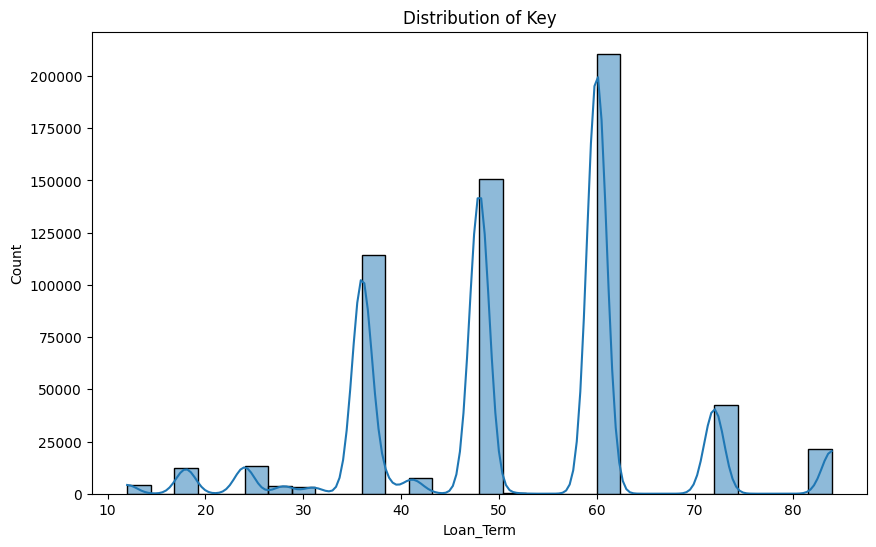

In [110]:
# Plot histolot to show data distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df_5p[num_cols[1]], bins=30, kde=True)

# Add title
plt.title("Distribution of " + num_cols[0])
plt.show()

Let's check for outliers

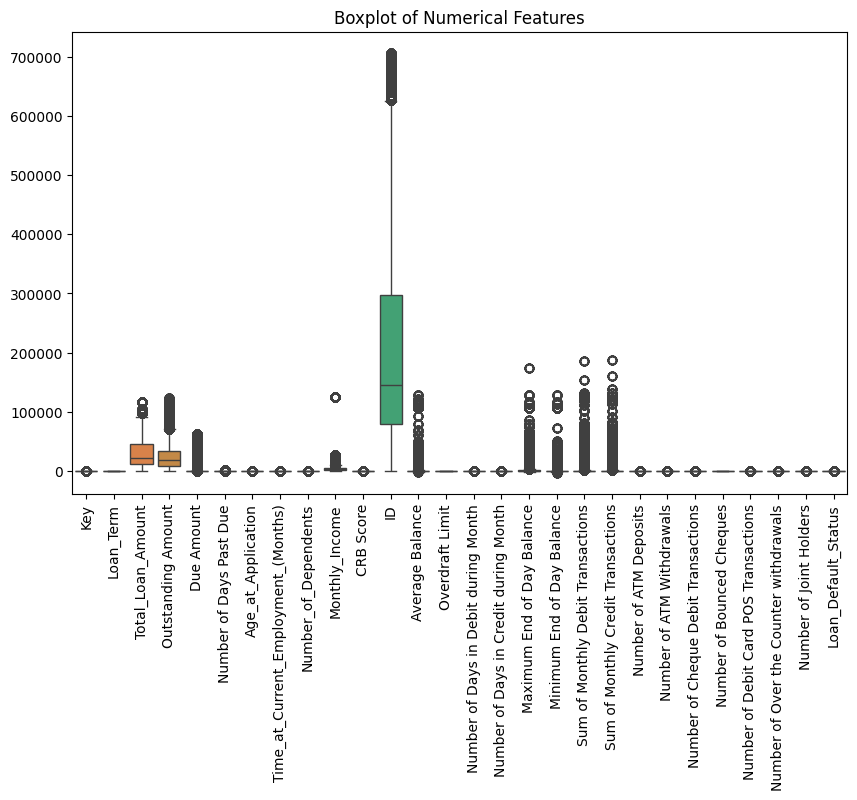

In [111]:
# Boxplots for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_merged_df_5p[num_cols])
plt.xticks(rotation=90)

# Add title
plt.title("Boxplot of Numerical Features")
plt.show()

*Observation*
* *Monthly_Income* has an outlier

### Categorical Columns Value counts

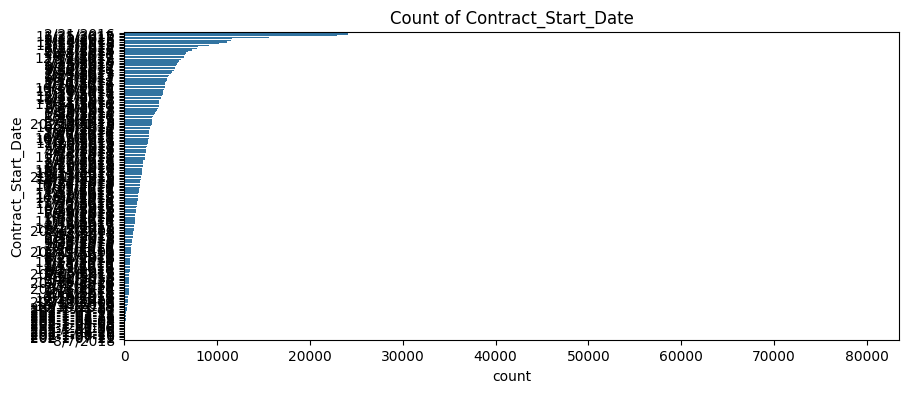

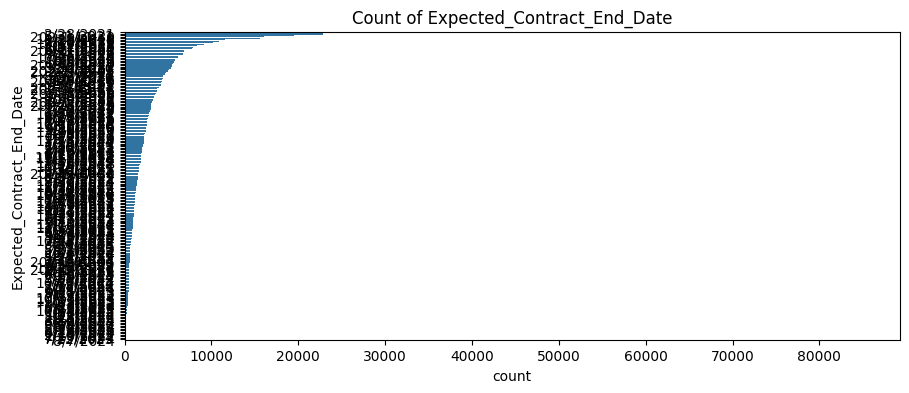

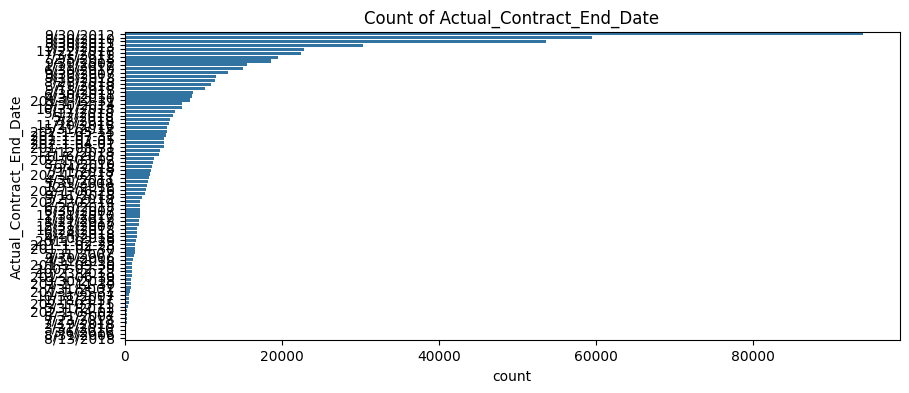

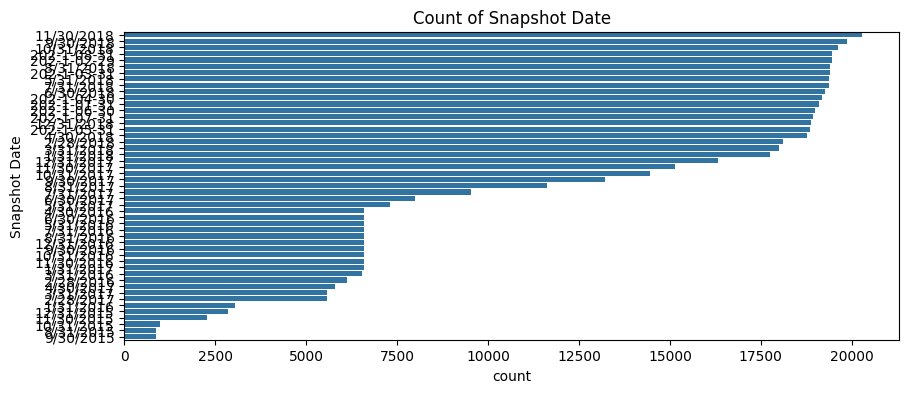

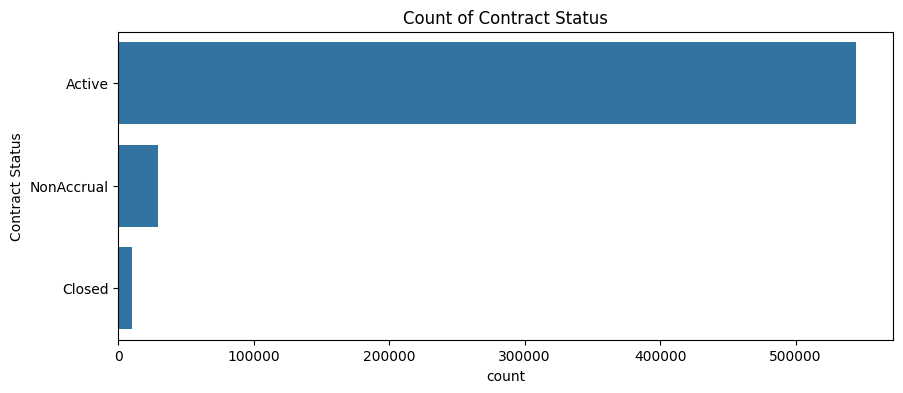

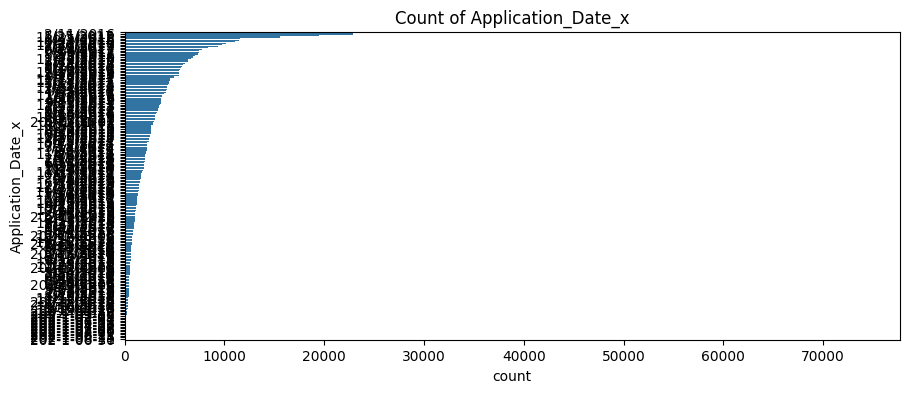

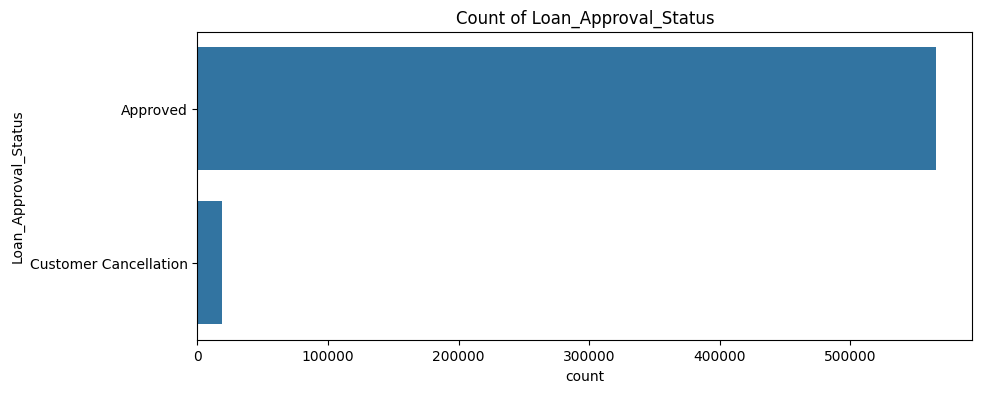

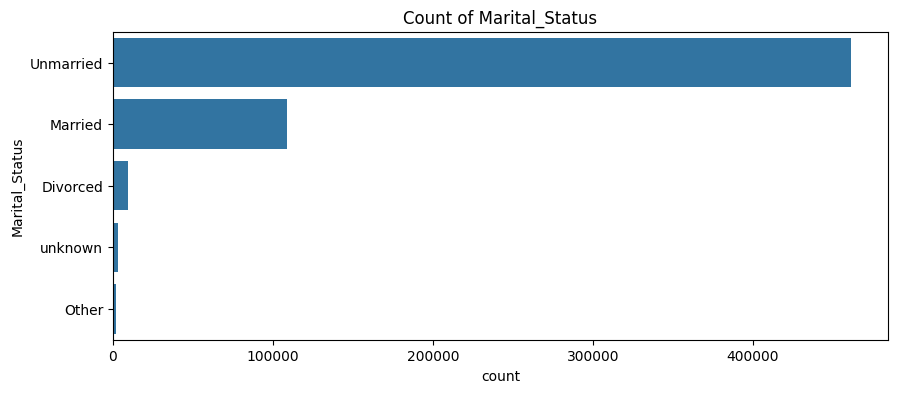

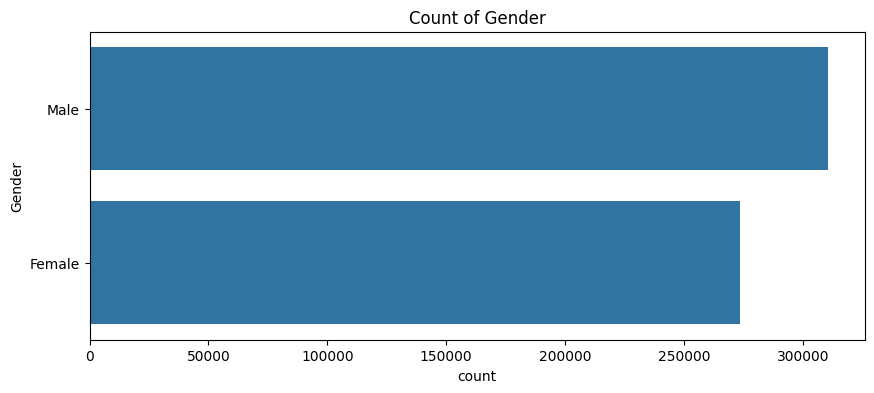

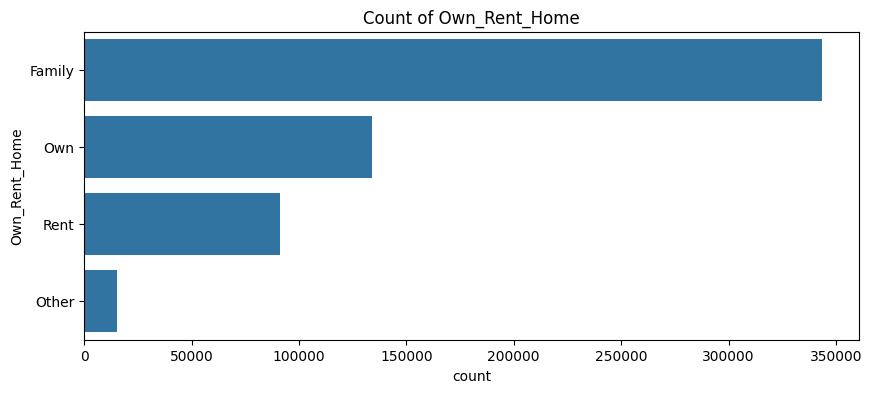

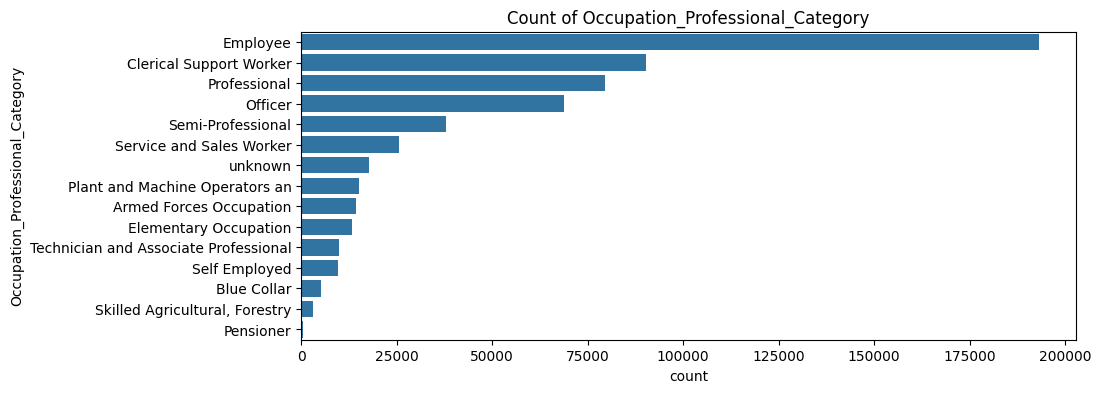

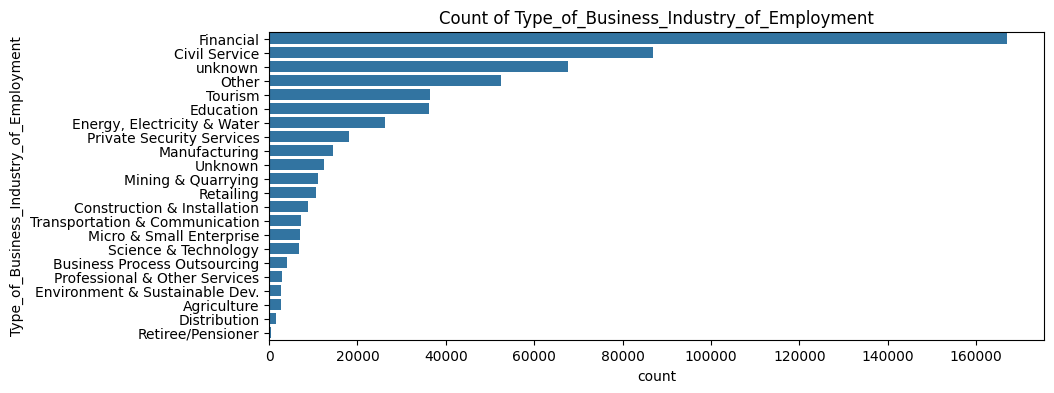

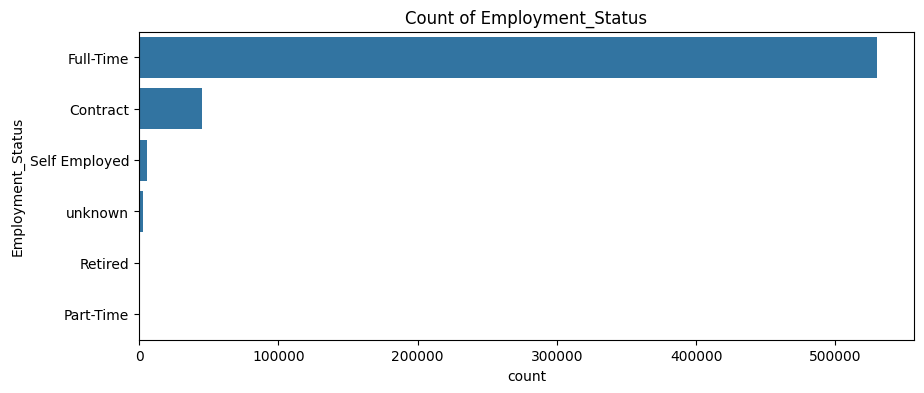

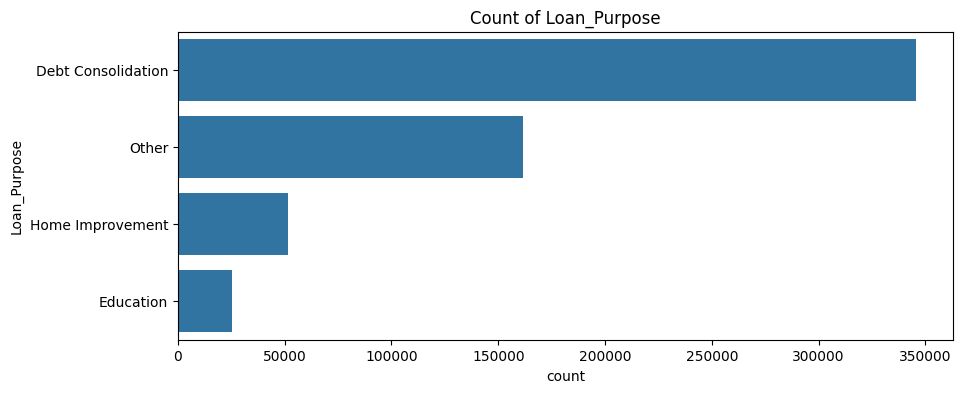

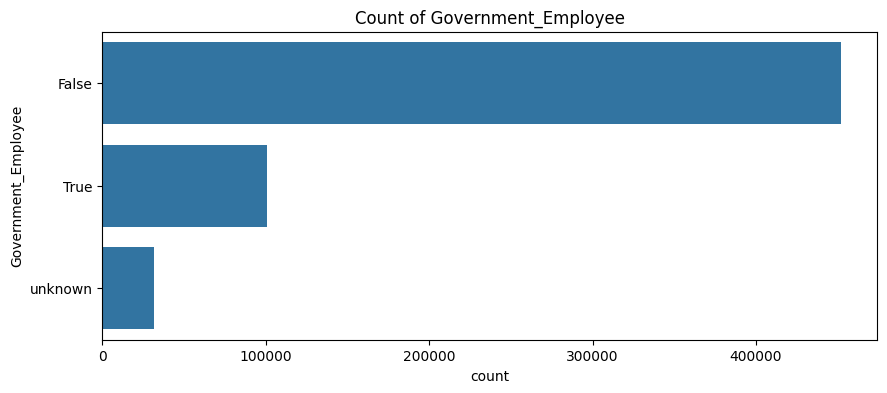

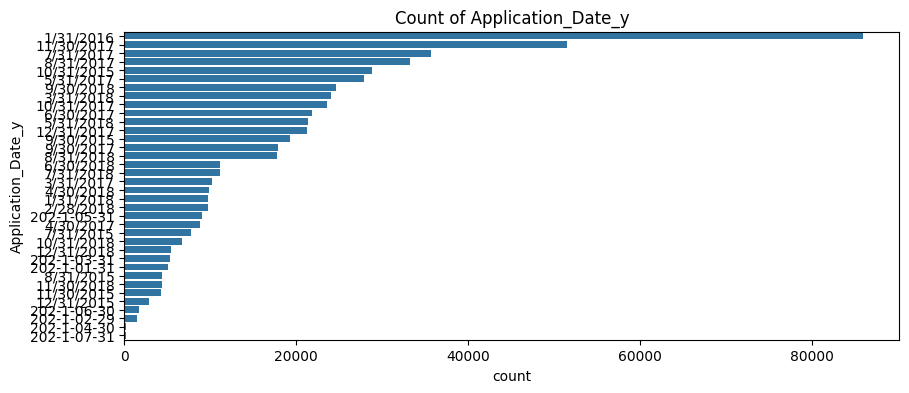

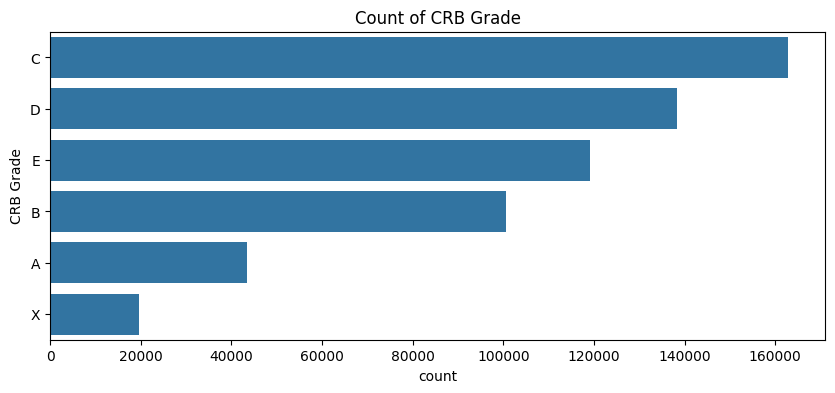

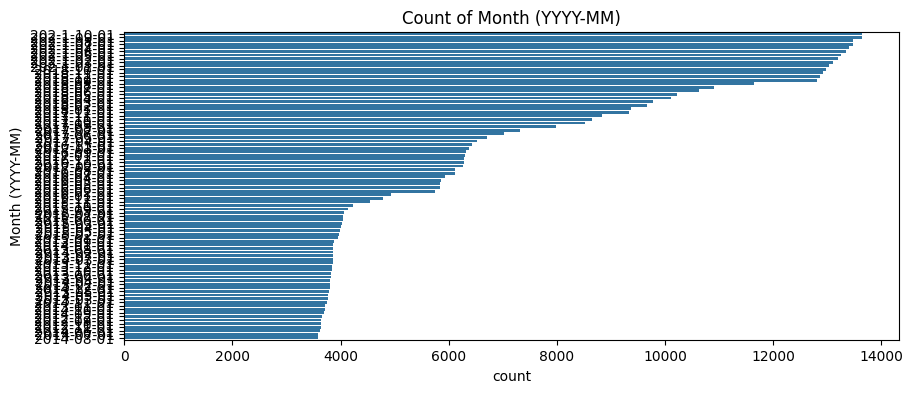

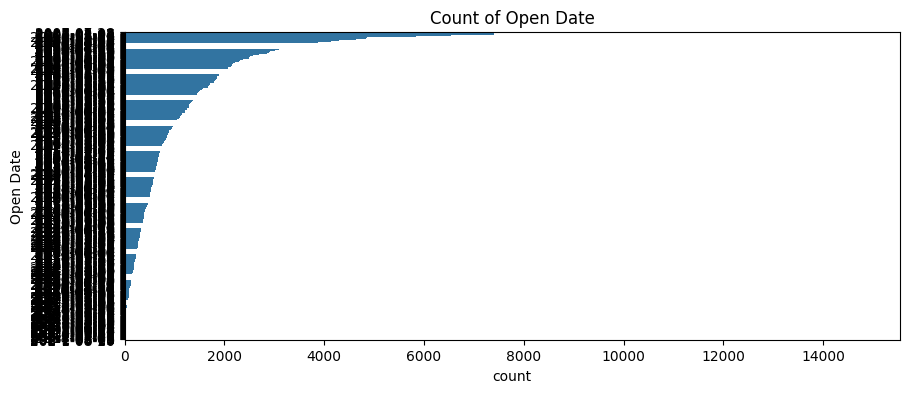

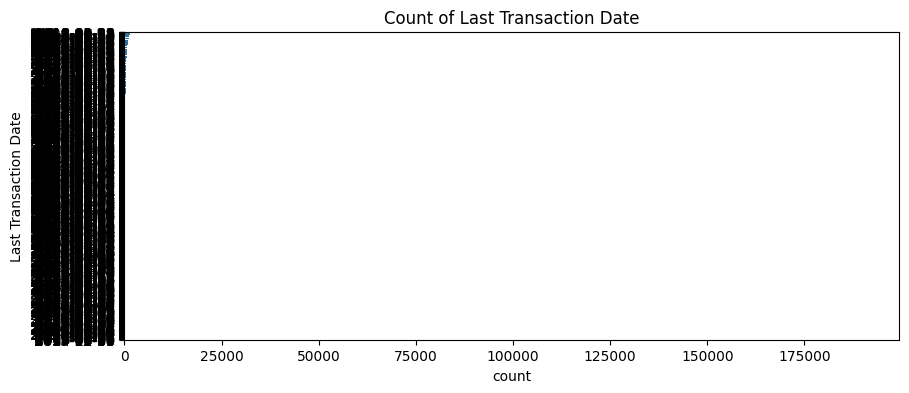

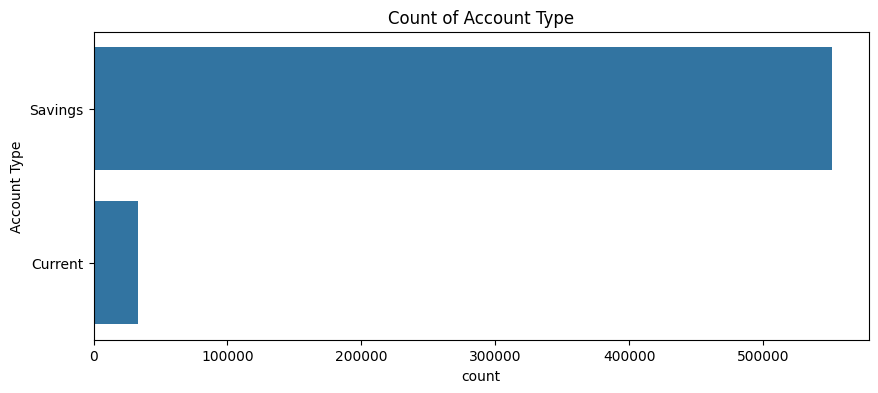

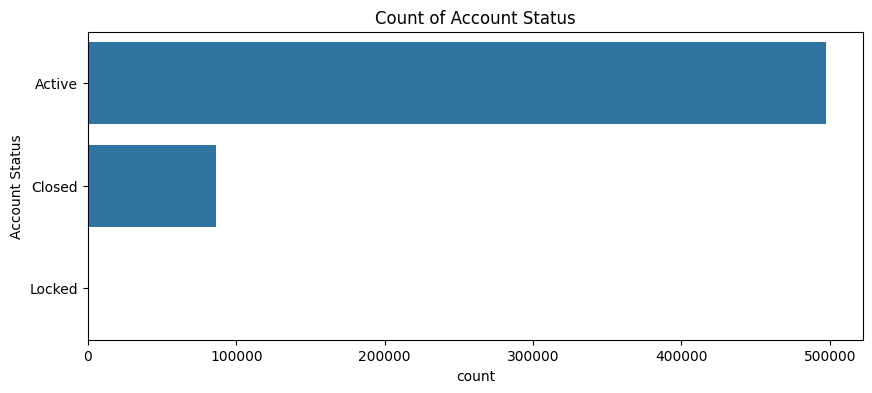

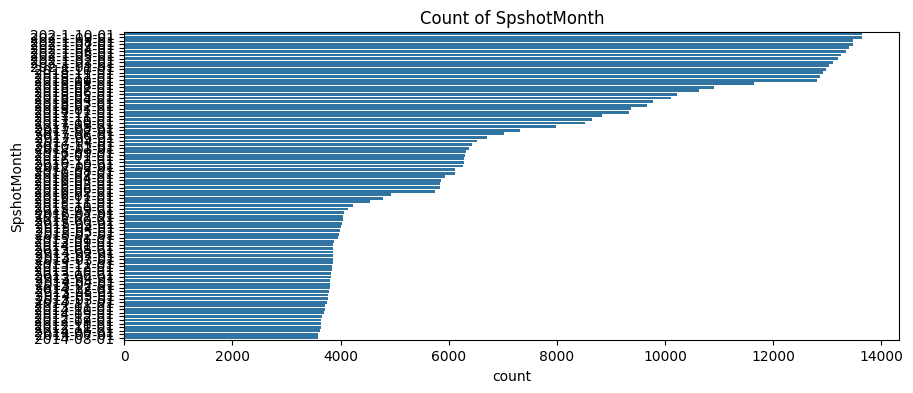

In [112]:
# Remove unnecessary columns
# # cat_cols.remove("Month (YYYY-MM)")
cat_cols.remove("Account_Number")
cat_cols.remove("Loan_Type")

# Categorical value counts
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=final_merged_df_5p[col], \
        order=final_merged_df_5p[col].value_counts().index)

    # Add title
    plt.title(f"Count of {col}")
    plt.show()

*Observations*

1.	Unmarried individuals take more loans followed by married individuals

2.	Slightly more male take loans then female individuals
3.	Individuals from ‘Family’ homes take more loans as opposed to those who own or rent homes
4.	More employed people take loans while pensioners are the least
5.	More individuals from the ‘Financial’ industry take loans followed by civil service industry
6.	Full-time employees take loans more than the rest. This can be justified as to who loans products are offered to.
7.	More individuals take loans for ‘Loan Consolidation’ while ‘Education’ loans are fewer
8.	The top 3 CRB grades that take loan are: C, D and E in descending order
9.	Individuals having ‘savings’ accounts take loans more as opposed to the ones with the ‘current’ accounts.



### **The distribution of Number of Loans by Loan-Term**

<ipython-input-113-fa006698a247>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, palette="Greens")


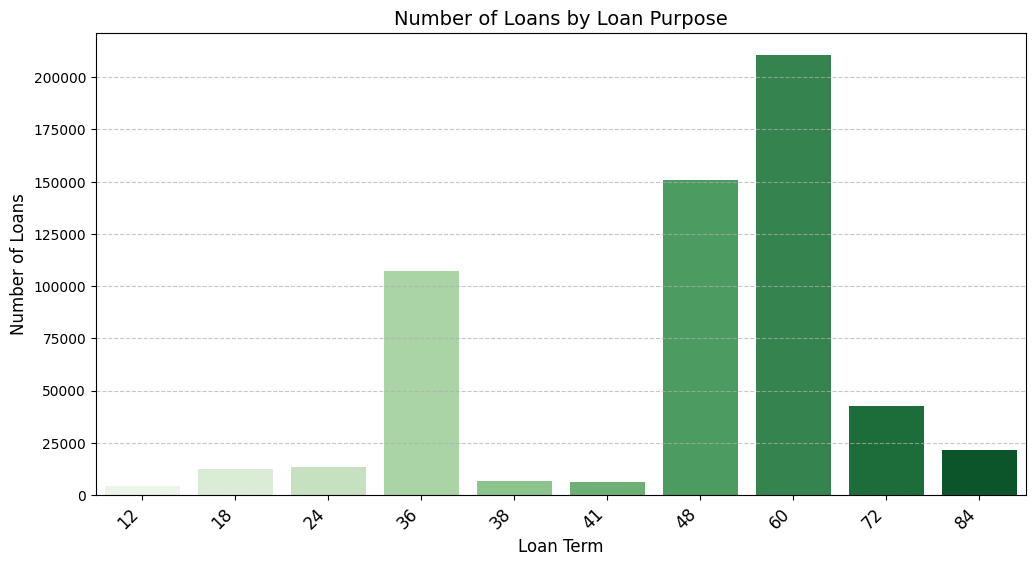

In [113]:
plt.figure(figsize=(12, 6))
loan_purpose_counts = final_merged_df_5p["Loan_Term"].value_counts().head(10)
sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, palette="Greens")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
plt.title("Number of Loans by Loan Purpose", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Key Observations:**
* Certain loan purposes have significantly higher loan counts compared to others.
* Some categories dominate, indicating they are more commonly sought by borrowers.

**Interpretation:**
* The concentration in a few loan purposes suggests strong borrower demand for specific financial needs.
* Less frequent loan purposes might be due to a lack of awareness, restrictive eligibility criteria, or lower demand.

**Recommendations:**
* If top loan purposes align with bank objectives, enhance offerings and risk assessment models for them.
* Promote underutilized loan purposes through awareness campaigns or improved accessibility.
* Assess repayment performance for each category to determine if any adjustments in interest rates or conditions are needed.

### **Distribution of Default Rate by Age Group**

<ipython-input-114-99bad63cbe7a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = final_merged_df_5p.groupby("Age_Group")["Loan_Default_Status"].mean() * 100
<ipython-input-114-99bad63cbe7a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_age.index, y=default_rate_by_age.values, palette="RdYlGn")


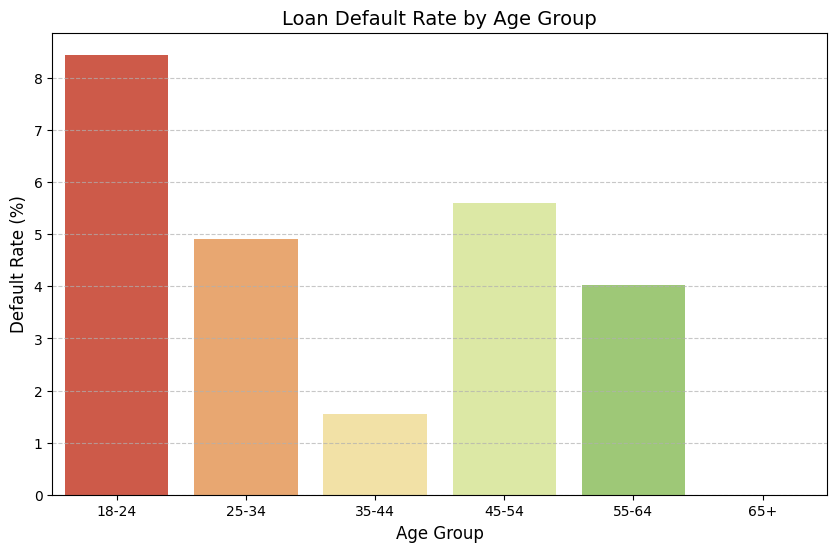

In [114]:
# create bins
age_bins = [18, 25, 35, 45, 55, 65, 75]

# Add labels
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# create the column
final_merged_df_5p["Age_Group"] = pd.cut(final_merged_df_5p["Age_at_Application"], \
    bins=age_bins, labels=age_labels, right=False)
default_rate_by_age = final_merged_df_5p.groupby("Age_Group")["Loan_Default_Status"].mean() * 100
plt.figure(figsize=(10, 6))

# Create a graph
sns.barplot(x=default_rate_by_age.index, y=default_rate_by_age.values, palette="RdYlGn")

# Add labels and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Loan Default Rate by Age Group", fontsize=14)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

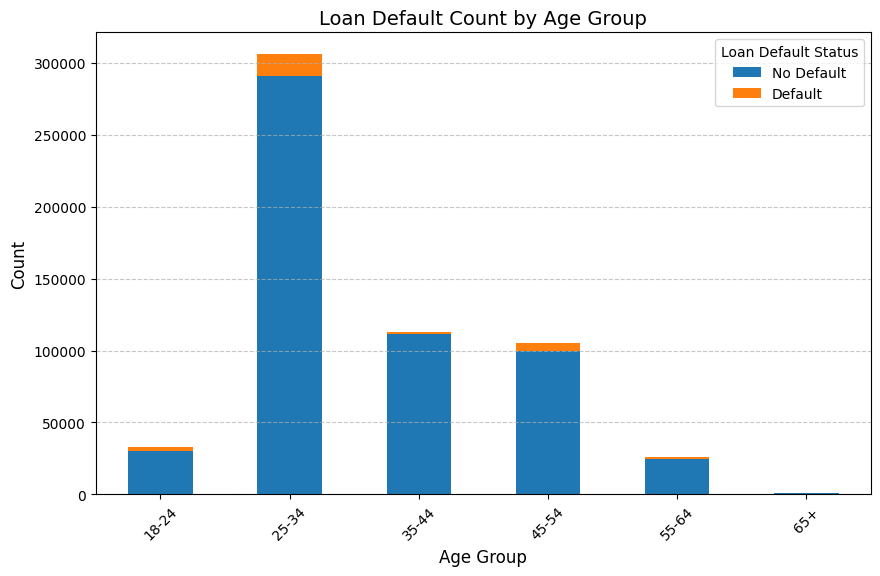

In [115]:
# Create crosstab (count)
crosstab_age_default = pd.crosstab(final_merged_df_5p["Age_Group"],\
    final_merged_df_5p["Loan_Default_Status"])

# Rename columns for better readability
crosstab_age_default.columns = ["No Default", "Default"]

# Plot stacked bar chart
crosstab_age_default.plot(kind="bar", stacked=True, figsize=(10,6))#, colormap="viridis")

# Add labels and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Loan Default Count by Age Group", fontsize=14)
plt.legend(title="Loan Default Status")
plt.xticks(rotation=45)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

*Observations*
1. Individuals aged between 18-24 years take more loans. they are followed by 45-54 year olds

2. The 65+ year old take/are given no loans

## Bivariate EDA

### **Loan Repayment Trends Over Time**

<ipython-input-116-45dc12c761ff>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_merged_df_5p["SpshotMonth"] = pd.to_datetime(final_merged_df_5p["SpshotMonth"], errors="coerce")


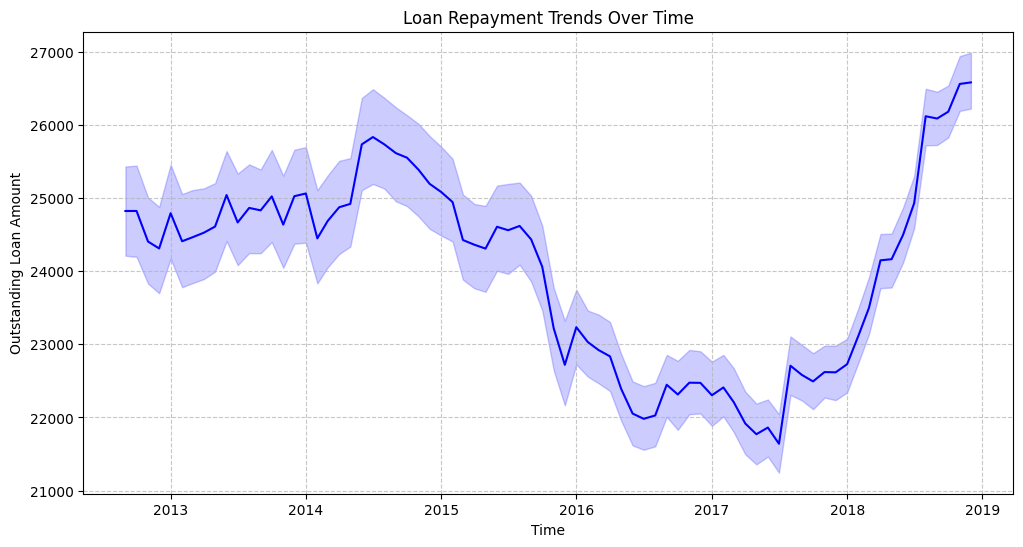

In [116]:
# Ensure the data is in datetime
final_merged_df_5p["SpshotMonth"] = pd.to_datetime(final_merged_df_5p["SpshotMonth"], errors="coerce")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=final_merged_df_5p["SpshotMonth"], y=final_merged_df_5p["Outstanding Amount"], color="blue")

# Add labels
plt.xlabel("Time")
plt.ylabel("Outstanding Loan Amount")
plt.title("Loan Repayment Trends Over Time")

# Show grid
plt.grid(True, linestyle="--", alpha=0.7)

# Show Plot
plt.show()

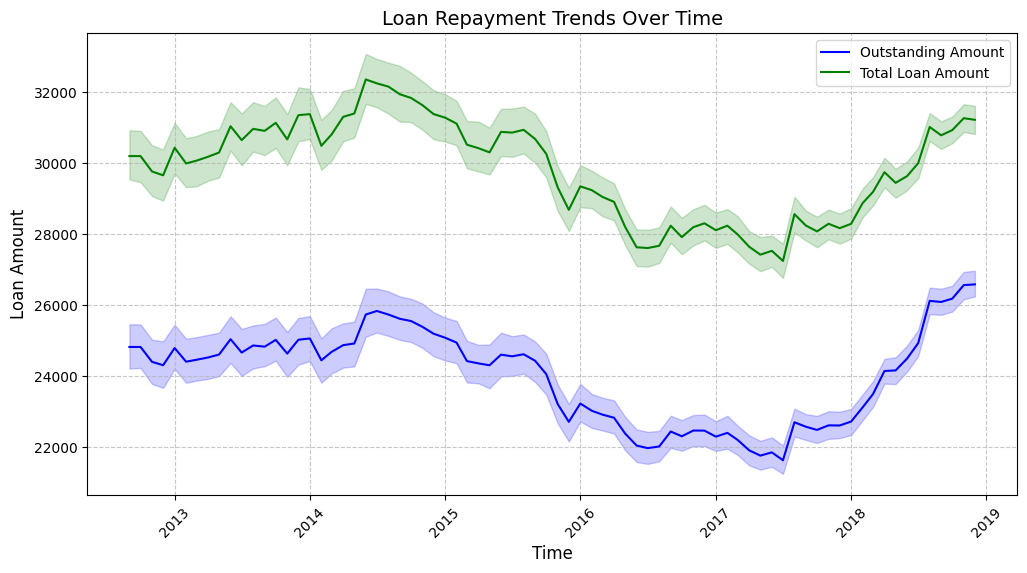

In [117]:
# Datetime conversion
final_merged_df_5p["SpshotMonth"] = pd.to_datetime(final_merged_df_5p["SpshotMonth"], errors="coerce")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=final_merged_df_5p["SpshotMonth"], y=final_merged_df_5p["Outstanding Amount"], color="blue", label="Outstanding Amount")
sns.lineplot(x=final_merged_df_5p["SpshotMonth"], y=final_merged_df_5p["Total_Loan_Amount"], color="green", label="Total Loan Amount")

# Labels & Title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.title("Loan Repayment Trends Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show Plot
plt.show()

*Obseravtions*


### **Loan Repayment Trends by Loan Purpose**

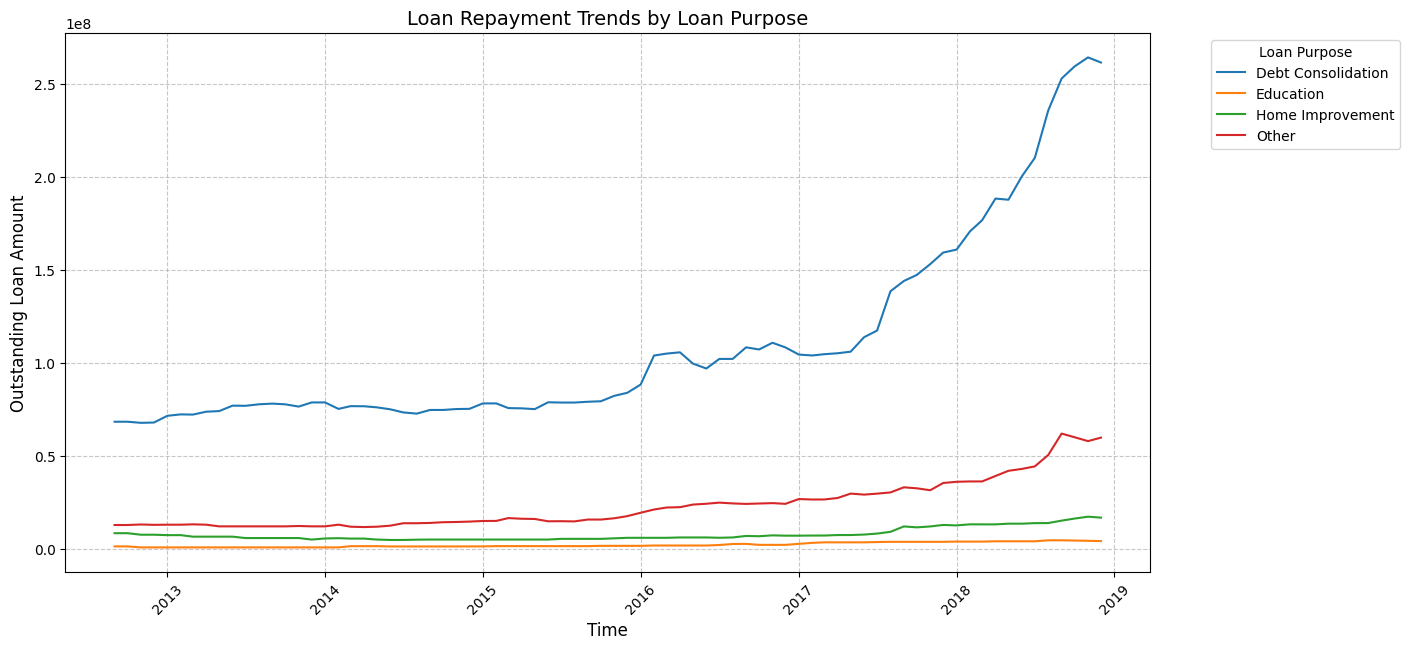

In [118]:
# Ensure datetime conversion
final_merged_df_5p["SpshotMonth"] = pd.to_datetime(final_merged_df_5p["SpshotMonth"], errors="coerce")

# Calculate Repaid Amount
final_merged_df_5p["Repaid Amount"] = final_merged_df_5p["Total_Loan_Amount"] - final_merged_df_5p["Outstanding Amount"]

# Aggregate Data by Loan Purpose and Month
loan_trends = final_merged_df_5p.groupby(["SpshotMonth", "Loan_Purpose"]).agg({
    "Outstanding Amount": "sum",
    "Total_Loan_Amount": "sum",
    "Repaid Amount": "sum"
}).reset_index()

# Plot Loan Repayment Trends for Different Loan Purposes
plt.figure(figsize=(14, 7))
sns.lineplot(data=loan_trends, x="SpshotMonth", y="Outstanding Amount", hue="Loan_Purpose", palette="tab10")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Outstanding Loan Amount", fontsize=12)
plt.title("Loan Repayment Trends by Loan Purpose", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Loan Purpose", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show Plot
plt.show()

### **Loan Default vs Borrower’s Financial Status**

* Loan_Default_Status vs Monthly_Income: Do low-income borrowers default more?

* Loan_Default_Status vs Average Balance: Do borrowers with lower account balances have higher default rates?

* Loan_Default_Status vs Overdraft Limit: Does access to overdraft impact loan default?

<ipython-input-119-6aaecb1fe6b9>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 1]["Monthly_Income"],
<ipython-input-119-6aaecb1fe6b9>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 0]["Monthly_Income"],


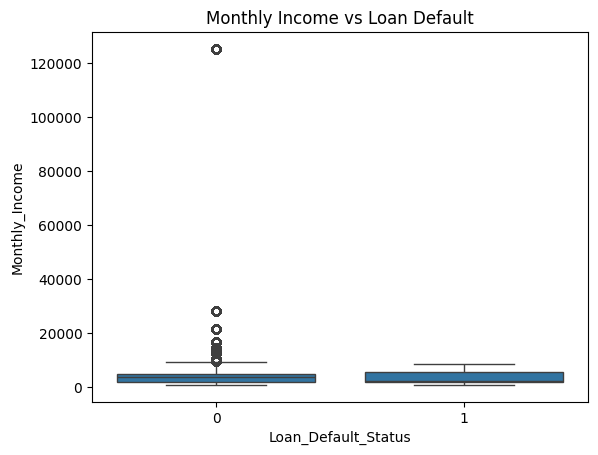

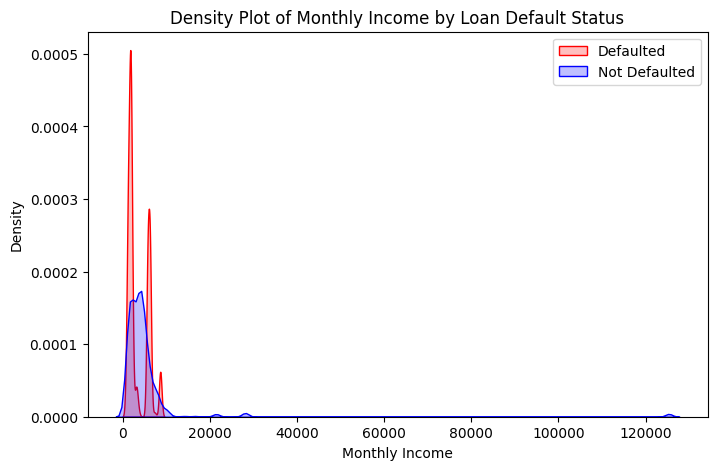

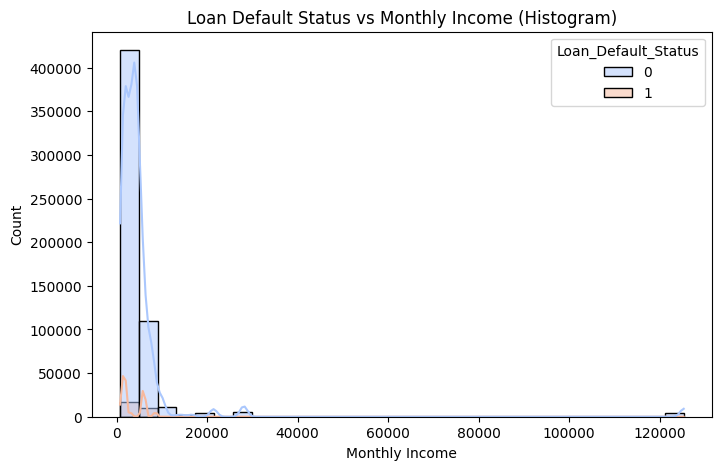

In [119]:
# Plot boxplot Loan_Default_Status vs Monthly_Income
sns.boxplot(x="Loan_Default_Status", y="Monthly_Income", data=final_merged_df_5p)

# Add title
plt.title("Monthly Income vs Loan Default")

# Plot a kde plot Loan_Default_Status vs Monthly_Income
plt.figure(figsize=(8, 5))
sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 1]["Monthly_Income"],
            label="Defaulted", shade=True, color="red")
sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 0]["Monthly_Income"],
            label="Not Defaulted", shade=True, color="blue")

# Add title
plt.title("Density Plot of Monthly Income by Loan Default Status")

# Add Lables
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()

plt.figure(figsize=(8, 5))
sns.histplot(final_merged_df_5p, x="Monthly_Income", hue="Loan_Default_Status",
             bins=30, kde=True, palette="coolwarm")
plt.title("Loan Default Status vs Monthly Income (Histogram)")
plt.xlabel("Monthly Income")
plt.ylabel("Count")

plt.show()

*Observation*
1. Individuals having an income between 0-15000 take loans more

### **Loan Default vs Loan Characteristics**

* Loan_Default_Status vs Loan_Type: Are certain loan types riskier?

* Loan_Default_Status vs Loan_Term: Do long-term loans default more?

* Loan_Default_Status vs Total_Loan_Amount: Do larger loans have higher default rates?

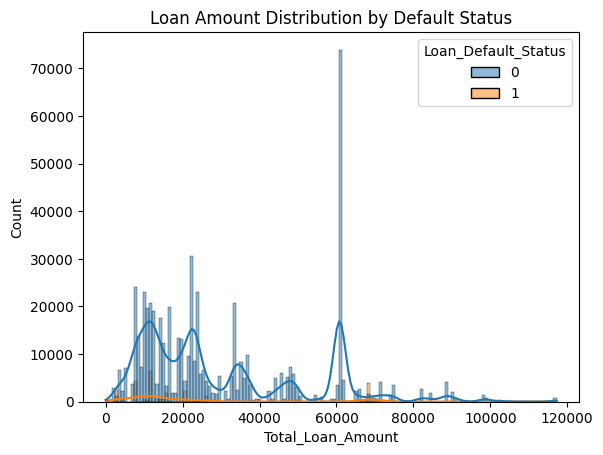

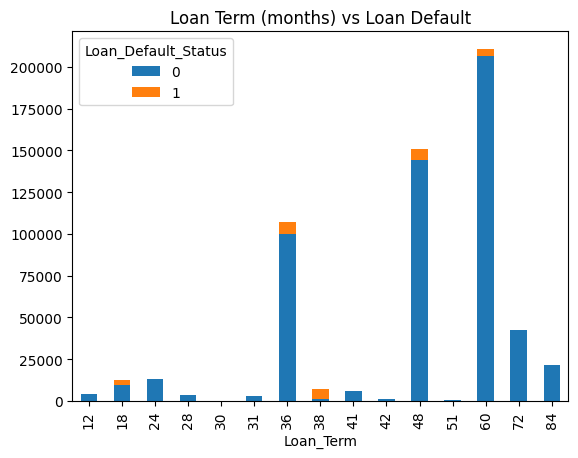

In [120]:
# Plot a hisplot Loan_Default_Status vs Total_Loan_Amount
sns.histplot(final_merged_df_5p, x="Total_Loan_Amount", hue="Loan_Default_Status", kde=True)
plt.title("Loan Amount Distribution by Default Status")

# Plot a crosstab bar plot Loan_Default_Status vs Loan_Term
pd.crosstab(final_merged_df_5p["Loan_Term"],
            final_merged_df_5p["Loan_Default_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Term (months) vs Loan Default")

plt.show()

*Observations*
1. Most of the loans taken are about 60,000
2. Majority of the people have take loans between 10,000 to about 30,000
3. loan defaulting is fairly distributed among all loan terms
4. Loans taken for a term of 38 months defualts more than the rest. But we also see most defaulters with a 36, 48 and 60 months loan terms



### **Loan Default vs Borrower Demographics**

* Loan_Default_Status vs Government_Employee: Are government employees less likely to default?

* Loan_Default_Status vs Number_of_Dependents: Does having more dependents increase default risk?

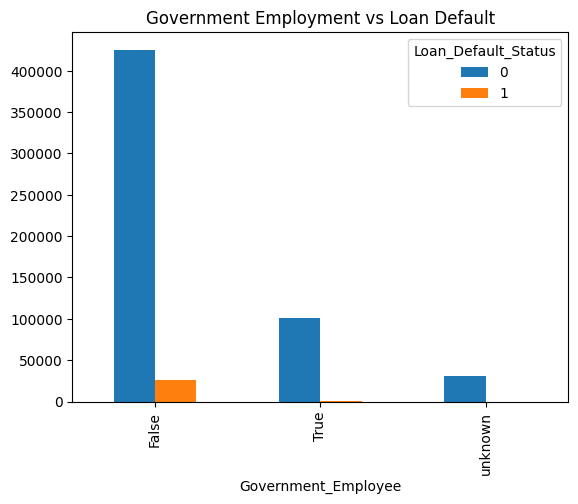

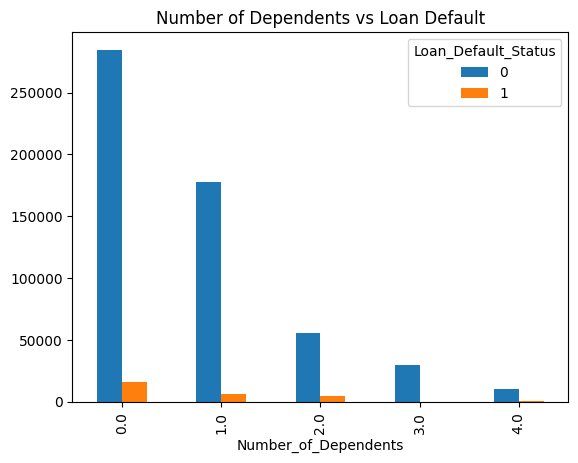

In [121]:
# Plot a crosstab bar plot Loan_Default_Status vs Government_Employee
pd.crosstab(final_merged_df_5p["Government_Employee"],
            final_merged_df_5p["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("Government Employment vs Loan Default")

# Plot a crosstab bar plot Loan_Default_Status vs Number_of_Dependents
pd.crosstab(final_merged_df_5p["Number_of_Dependents"],
            final_merged_df_5p["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("Number of Dependents vs Loan Default")

plt.show()

*Observations*
1. More Non-defaulters are single (no dependants) and non-government employees.
2. Individuals with no dependants take more loans hence more defaulters compared to individuals with dependants.
3. The more the dependants the less they take loan and the less the defaulting e.g. individuals with 4 dependants show no defaulting as shown by this sample.


### **Loan Default vs Credit History**
* Loan_Default_Status vs CRB Score: Does a lower CRB score correlate with higher defaults?

* Loan_Default_Status vs CRB Grade: Are borrowers in lower CRB grades more likely to default?

<ipython-input-122-1b93cda8ae20>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 1]["CRB Score"],
<ipython-input-122-1b93cda8ae20>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 0]["CRB Score"],


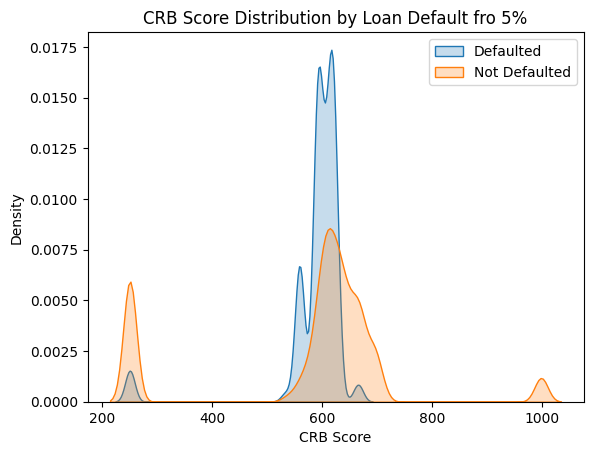

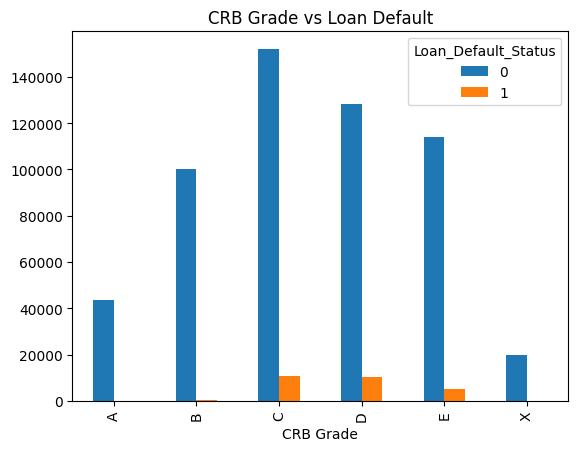

In [122]:
# # Plot a kdeplot plot Loan_Default_Status vs CRB Score
# sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 1]["CRB Score"],
#             label="Defaulted", shade=True)
# sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 0]["CRB Score"],
#             label="Not Defaulted", shade=True)
# # Add title
# plt.title("CRB Score Distribution by Loan Default")


# Plot a kdeplot plot Loan_Default_Status vs CRB Score for 5% sampled
sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 1]["CRB Score"],
            label="Defaulted", shade=True)
sns.kdeplot(final_merged_df_5p[final_merged_df_5p["Loan_Default_Status"] == 0]["CRB Score"],
            label="Not Defaulted", shade=True)
# Add title
plt.title("CRB Score Distribution by Loan Default fro 5%")


# Add a legend
plt.legend()

# Plot a crosstab bar plot Loan_Default_Status vs CRB Grade
pd.crosstab(final_merged_df_5p["CRB Grade"],
            final_merged_df_5p["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("CRB Grade vs Loan Default")

plt.show()

*Observations*
1. Individuals having a CRB score between 500-700 take loans more and have more defaulters.
2. A CRB score between 200-300 have less defualters than non-defaulters.

### **Loan Default vs Account Behavior**
* Loan_Default_Status vs Sum of Monthly Credit Transaction: Do people with higher credit transactions default less?

* Loan_Default_Status vs Number of Days in Debit during Month: Does frequently being in debit predict default?

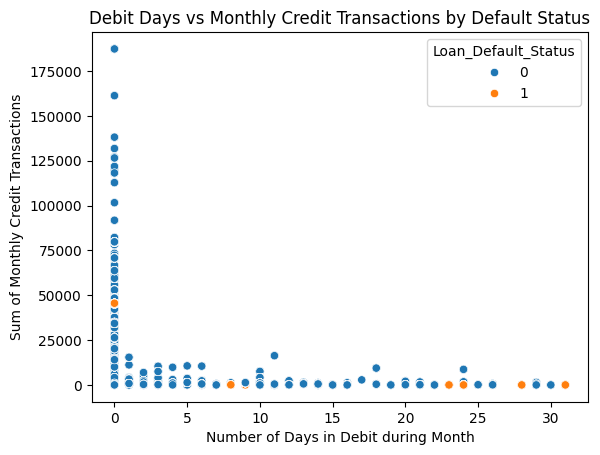

In [123]:
sns.scatterplot(x="Number of Days in Debit during Month",
                y="Sum of Monthly Credit Transactions",
                hue="Loan_Default_Status", data=final_merged_df_5p)
plt.title("Debit Days vs Monthly Credit Transactions by Default Status")
plt.show()

*Observations*
1. Individuals who are in debit on the 0, 8th, 23rd, 24th, 27th and 31st day of the month default more as compared to other days.

### Correlations

In [124]:
# Select only numeric columns for correlation
numeric_df = final_merged_df_5p.select_dtypes(include=[np.number])

# Compute correlation of numeric features
correlation_matrix = numeric_df.corr()

# Extract correlation of numerical features with Loan Default
loan_default_corr = correlation_matrix.get("Loan_Default_Status", None)

if loan_default_corr is not None:
    loan_default_corr = loan_default_corr.drop("Loan_Default_Status").sort_values(ascending=False)
    print("Top Features Correlated with Loan Default:\n", loan_default_corr)
else:
    print("Loan_Default_Status column not found in correlation matrix.")

Top Features Correlated with Loan Default:
 Number of Days Past Due                   0.832040
Due Amount                                0.595606
Number of Days in Debit during Month      0.127962
Key                                       0.024045
CRB Score                                 0.015544
Time_at_Current_Employment_(Months)      -0.006982
Number of Cheque Debit Transactions      -0.007895
Number of ATM Deposits                   -0.020409
Age_at_Application                       -0.030747
Number_of_Dependents                     -0.030826
Number of Over the Counter withdrawals   -0.031080
Monthly_Income                           -0.033917
Minimum End of Day Balance               -0.034240
Average Balance                          -0.039460
Sum of Monthly Debit Transactions        -0.041647
Sum of Monthly Credit Transactions       -0.042020
Number of Debit Card POS Transactions    -0.048731
Maximum End of Day Balance               -0.048951
Repaid Amount                         

<ipython-input-125-aff526c26628>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_default_corr.values, y=loan_default_corr.index, palette="RdYlGn")


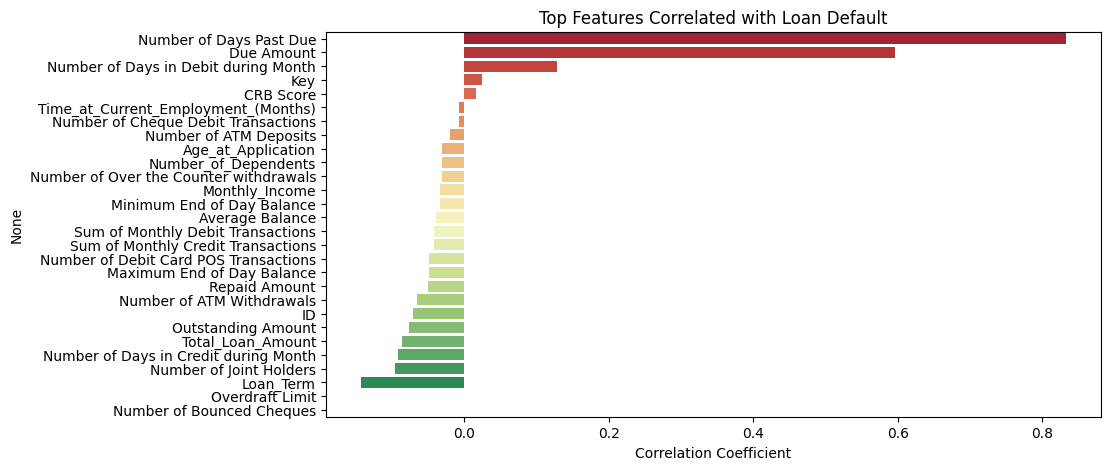

In [125]:
# Barplot of top correlated features with Loan Default
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_default_corr.values, y=loan_default_corr.index, palette="RdYlGn")
plt.title("Top Features Correlated with Loan Default")
plt.xlabel("Correlation Coefficient")
plt.show()

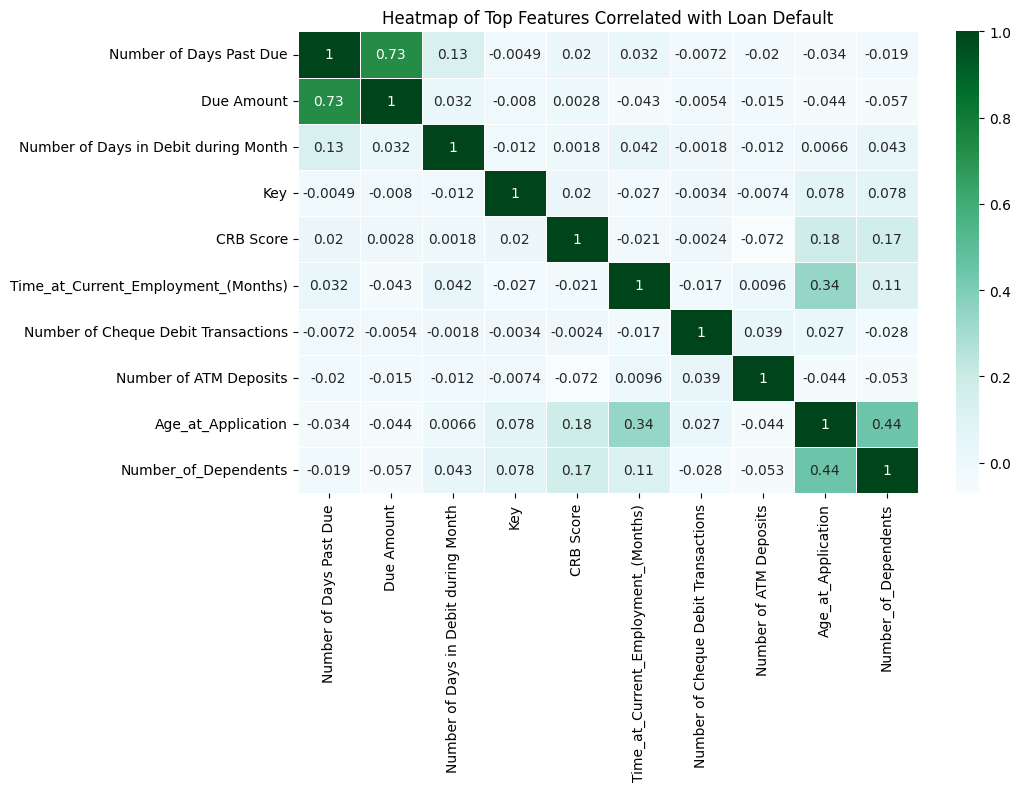

In [126]:
#Plot Focused Heatmap for Key Features

# Select the top features most correlated with Loan Default
top_features = loan_default_corr.index[:10]  # Select top 10 correlated features

# Create heatmap for top correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.loc[top_features, top_features], cmap="BuGn", annot=True, linewidths=0.5)

plt.title("Heatmap of Top Features Correlated with Loan Default")
plt.show()

In [127]:
# # Create pairplot
# sns.pairplot(numeric_df) #numerical_cols_df)
# plt.show()

# Feature Selection

## Finding key features that explain most variance

In [128]:
# final_merged_1m_df["Loan_Default_Status"] = final_merged_1m_df["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

# final_merged_df_100k["Loan_Default_Status"] = final_merged_df_100k["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

**Custom Mapping (Ordinal Encoding/Label Encoding)**

Use LE for ordinal (ordered) categorical variables:
* Occupation_Professional_Category (16 categories)
* Type_of_Business_Industry_of_Employment (24 categories)
* Contract Status (Active, NonAccrual, Closed)
* Loan_Purpose (Debt Consolidation, Other, Home Improvement, Education, unknown)
* Loan_Approval_Status (Approved, Customer Cancellation)
* Government_Employee (False, True, unknown)
* Account Type (Savings, Current)
* Account Status (Active, Closed, Locked)
* CRB Grade (A ,B, C, D, E, X)
* Gender (Female, Male)
* Marital_Status: (Unmarried < Married < Divorced < Widowed < Other < Unknown)
* Own_Rent_Home: (Family < Own < Rent < Other < Unknown)
* Employment_Status: (Retired < Part-Time < Self Employed < Contract < Full-Time < Unknown)

### Ordinal Encoding / Label Encoding

In [129]:
# dataset = pd.read_csv("C:/Users/amerc/Desktop/Project data/final_merged_1m_df.csv")
# dataset.head()

# dataset = pd.read_csv("C:/Users/amerc/Desktop/Project data/final_merged_df_5p.csv")
dataset = final_merged_df_5p
dataset.head(2)

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,Loan_Default_Status,Age_Group,Repaid Amount
0,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,0.0,0.0,Current,Active,0.0,NaT,0,25-34,0.0
1,C302107229,1,Unsecured Personal Loan,202-1-07-15,7/15/2024,9/30/2007,60,39493.55,202-1-07-31,39493.55,...,0.0,10.0,1.0,Current,Active,0.0,NaT,0,25-34,0.0


In [130]:
# dataset[dataset.columns[26]].value_counts()
dataset["Government_Employee"].value_counts()

,count
Government_Employee,
False,451725
True,100967
unknown,31418


Since the "Government_Employee" column still has issues, let us align it well.

In [131]:
# Define the mapping
mapping = {False: "false", True: "true", "False": "false", 'True': "true", 'unknown': "unknown"}

# Apply the mapping
dataset['Government_Employee'] = dataset['Government_Employee'].map(mapping)

In [132]:
# Confirm
dataset["Government_Employee"].value_counts()

,count
Government_Employee,
false,451725
true,100967
unknown,31418


In [133]:
# Check nulls
dataset["Government_Employee"].isnull().sum()

np.int64(0)

In [134]:
# Get dtatset summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584110 entries, 0 to 584109
Data columns (total 56 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Application_ID                           584110 non-null  object        
 1   Key                                      584110 non-null  int64         
 2   Loan_Type                                584110 non-null  object        
 3   Contract_Start_Date                      584110 non-null  object        
 4   Expected_Contract_End_Date               584110 non-null  object        
 5   Actual_Contract_End_Date                 584110 non-null  object        
 6   Loan_Term                                584110 non-null  int64         
 7   Total_Loan_Amount                        584110 non-null  float64       
 8   Snapshot Date                            584110 non-null  object        
 9   Outstanding Amount        

In [135]:
# Encode the contract_status column
contract_status_mapping = {'Active': 0, 'NonAccrual': 1, 'Closed': 2}
dataset['Contract Status'] = dataset['Contract Status'].map(contract_status_mapping)


In [136]:
# Confirm if encoded/mapped
dataset['Contract Status'].value_counts()

,count
Contract Status,
0,545011
1,29095
2,10004


Encode other columns

In [137]:
# Encode othre columns
marital_status_mapping = {'unknown': 0, 'Other': 1, 'Unmarried': 2, 'Widowed': 3, 'Divorced': 4, 'Married': 5}
dataset['Marital_Status'] = dataset['Marital_Status'].map(marital_status_mapping)

own_rent_home_mapping = {'unknown': 0, 'Other': 1, 'Family': 2, 'Rent': 3, 'Own': 4}
dataset['Own_Rent_Home'] = dataset['Own_Rent_Home'].map(own_rent_home_mapping)

employment_status_mapping = {'unknown': 0, 'Retired': 1, 'Part-Time': 2, 'Contract': 3, 'Self Employed': 4, 'Full-Time': 5}
dataset['Employment_Status'] = dataset['Employment_Status'].map(employment_status_mapping)

loan_purpose_mapping = {'unknown': 0, 'Other': 1, 'Education': 2, 'Home Improvement': 3, 'Debt Consolidation': 4}
dataset['Loan_Purpose'] = dataset['Loan_Purpose'].map(loan_purpose_mapping)

loan_approval_status_mapping = {'Customer Cancellation': 0, 'Approved': 1}
dataset['Loan_Approval_Status'] = dataset['Loan_Approval_Status'].map(loan_approval_status_mapping)

account_type_mapping = {'Savings': 0, 'Current': 1}
dataset['Account Type'] = dataset['Account Type'].map(account_type_mapping)


# Define the mapping - Account Status
account_status_mapping = {'Locked': 0, 'Closed': 1, 'Active': 2}
# Apply the mapping
dataset['Account Status'] = dataset['Account Status'].map(account_status_mapping)

# Define the mapping- crb Grade
crb_grade_mapping = {'X': 0, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A': 5}
# Apply the mapping
dataset['CRB Grade'] = dataset['CRB Grade'].map(crb_grade_mapping)



In [138]:
dataset.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


In [139]:
# Map the Government_Employee column
government_employee_mapping = {'unknown': 0, 'false': 1, 'true': 2}
dataset['Government_Employee'] = dataset['Government_Employee'].map(government_employee_mapping)

In [140]:
# Confirm
dataset["Government_Employee"].value_counts()

,count
Government_Employee,
1,451725
2,100967
0,31418


In [141]:
# Define the mapping
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
# Apply the mapping
dataset['Gender'] = dataset['Gender'].map(gender_mapping)


In [142]:
# Check nulls
dataset["Gender"].value_counts()#.sum()

,count
Gender,
1,310386
0,273724


In [143]:
# dataset['Occupation_Professional_Category'].value_counts().index
dataset["Type_of_Business_Industry_of_Employment"].value_counts().index

Index(['Financial', 'Civil Service', 'unknown', 'Other', 'Tourism',
       'Education', 'Energy, Electricity & Water', 'Private Security Services',
       'Manufacturing', 'Unknown', 'Mining & Quarrying', 'Retailing',
       'Construction & Installation', 'Transportation & Communication',
       'Micro & Small Enterprise', 'Science & Technology',
       'Business Process Outsourcing', 'Professional & Other Services',
       'Environment & Sustainable Dev.', 'Agriculture', 'Distribution',
       'Retiree/Pensioner'],
      dtype='object', name='Type_of_Business_Industry_of_Employment')

In [144]:
dataset['Type_of_Business_Industry_of_Employment'].replace('unknown', \
    'Unknown', inplace=True)

<ipython-input-144-4dc1ad8aed6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Type_of_Business_Industry_of_Employment'].replace('unknown', \


In [145]:
# dataset['Occupation_Professional_Category']
# occupation_Prof_Cat_mapping = {'Employee': 0, 'Clerical Support Worker':1,
            #   'Professional': 2, 'Service and Sales Worker':3, 'Officer': 4,
            #   'Armed Forces Occupation': 5, 'Blue Collar': 6,
            #   'Plant and Machine Operators an': 7,
            #   'Technician and Associate Professional': 8}
occupation_Prof_Cat_mapping ={'unknown':0,'Employee':1, 'Clerical Support Worker':2,
                              'Professional':3, 'Officer':4,
       'Semi-Professional':5, 'Service and Sales Worker':6,
       'Plant and Machine Operators an':7, 'Armed Forces Occupation':8,
       'Elementary Occupation':9, 'Technician and Associate Professional':10,
       'Self Employed':11, 'Blue Collar':12, 'Skilled Agricultural, Forestry':13,
       'Pensioner':14}
# Map
dataset['Occupation_Professional_Category'] = \
       dataset['Occupation_Professional_Category'].\
       map(occupation_Prof_Cat_mapping)

# type_of_Bus_Industry_of_Emp_mapping= {'unknown':0,'Financial':1,
#               'Civil Service':2, 'Education':3, 'Tourism':4, 'Manufacturing':4,
#               'Distribution':5, 'Science & Technology':6,
#               'Professional & Other Services':7, 'Energy, Electricity & Water':8,
#               'Transportation & Communication':9, 'Mining & Quarrying':10,
#               'Micro & Small Enterprise':11, 'Other':12}

type_of_Bus_Industry_of_Emp_mapping = {'Unknown':0,'Financial':1, 'Civil Service':2,
       'Tourism':3,'Education':4, 'Energy, Electricity & Water':5,
       'Private Security Services':6, 'Manufacturing':7, 'Mining & Quarrying':8,
       'Retailing':9,'Construction & Installation':10,
       'Transportation & Communication':11,'Micro & Small Enterprise':12,
       'Science & Technology':13,'Business Process Outsourcing':14,
       'Professional & Other Services':15,'Environment & Sustainable Dev.':16,
       'Agriculture':17, 'Distribution':18,'Retiree/Pensioner':19,'Other':20}
# Map
dataset['Type_of_Business_Industry_of_Employment'] = \
       dataset['Type_of_Business_Industry_of_Employment'].\
              map(type_of_Bus_Industry_of_Emp_mapping)

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584110 entries, 0 to 584109
Data columns (total 56 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Application_ID                           584110 non-null  object        
 1   Key                                      584110 non-null  int64         
 2   Loan_Type                                584110 non-null  object        
 3   Contract_Start_Date                      584110 non-null  object        
 4   Expected_Contract_End_Date               584110 non-null  object        
 5   Actual_Contract_End_Date                 584110 non-null  object        
 6   Loan_Term                                584110 non-null  int64         
 7   Total_Loan_Amount                        584110 non-null  float64       
 8   Snapshot Date                            584110 non-null  object        
 9   Outstanding Amount        

In [147]:

dataset.isnull().sum()

,0
Application_ID,0
Key,0
Loan_Type,0
Contract_Start_Date,0
Expected_Contract_End_Date,0
Actual_Contract_End_Date,0
Loan_Term,0
Total_Loan_Amount,0
Snapshot Date,0
Outstanding Amount,0


In [148]:
# Check nulls
dataset["Type_of_Business_Industry_of_Employment"].isnull().sum()

np.int64(0)

In [149]:
# Check dupicates
dataset.duplicated().sum()

np.int64(0)

## Feature selection - (Correlation analysis & RFE)

### Using Correlation Analysis (Numerical features only)

In [150]:
# Compute correlation matrix
#corr_matrix = dataset.corr()

# Sort correlation values with target variable
#corr_target = corr_matrix["Loan_Default_Status"].abs().sort_values(ascending=False)
# print(corr_target)

# Select features with correlation >= 0.1
#strong_features = corr_target[corr_target >= 0.1].index

# Drop weakly correlated features
#df_selected = dataset[strong_features]

#print("Selected Features:", [df_selected.columns])

# # Visualize top correlated features
# plt.figure(figsize=(10,6))
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
# plt.title("Correlation Heatmap")
# plt.show()

### Chi Sqaure - Feature selection

In [151]:
# Identify date columns
date_cols = ['Contract_Start_Date', 'Expected_Contract_End_Date', 'Actual_Contract_End_Date',
             'Snapshot Date', 'Month (YYYY-MM)', 'SpshotMonth', "Application_Date_x",
             "Application_Date_y", "Open Date","Last Transaction Date"]

# Drop date columns
dataset = dataset.drop(columns=date_cols, errors='ignore')

# Display remaining columns
print("Remaining columns after dropping date columns:")
print(dataset.columns)

Remaining columns after dropping date columns:
Index(['Application_ID', 'Key', 'Loan_Type', 'Loan_Term', 'Total_Loan_Amount',
       'Outstanding Amount', 'Due Amount', 'Number of Days Past Due',
       'Contract Status', 'Loan_Approval_Status', 'Age_at_Application',
       'Marital_Status', 'Gender', 'Own_Rent_Home',
       'Occupation_Professional_Category',
       'Type_of_Business_Industry_of_Employment', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Number_of_Dependents',
       'Loan_Purpose', 'Monthly_Income', 'Government_Employee', 'CRB Score',
       'CRB Grade', 'ID', 'Account_Number', 'Average Balance',
       'Overdraft Limit', 'Number of Days in Debit during Month',
       'Number of Days in Credit during Month', 'Maximum End of Day Balance',
       'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions',
       'Sum of Monthly Credit Transactions', 'Number of ATM Deposits',
       'Number of ATM Withdrawals', 'Number of Cheque Debit Transac

In [152]:
# Drop irrelevant columns
dataset.drop(columns=["Application_ID", "ID", "Loan_Type",
                      "Account_Number", 'Age_Group'], inplace=True)

In [153]:
# Confirm
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584110 entries, 0 to 584109
Data columns (total 41 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Key                                      584110 non-null  int64  
 1   Loan_Term                                584110 non-null  int64  
 2   Total_Loan_Amount                        584110 non-null  float64
 3   Outstanding Amount                       584110 non-null  float64
 4   Due Amount                               584110 non-null  float64
 5   Number of Days Past Due                  584110 non-null  float64
 6   Contract Status                          584110 non-null  int64  
 7   Loan_Approval_Status                     584110 non-null  int64  
 8   Age_at_Application                       584110 non-null  float64
 9   Marital_Status                           584110 non-null  int64  
 10  Gender                          

In [154]:
# Define features (X) and target (y)
X = dataset[['Contract Status', 'Loan_Approval_Status', 'Marital_Status', 'Gender',
             'Own_Rent_Home', 'Occupation_Professional_Category',
             'Type_of_Business_Industry_of_Employment', 'Employment_Status',
             'Loan_Purpose', 'Government_Employee', 'CRB Grade', 'Account Type',
             'Account Status']]

y = dataset['Loan_Default_Status']

# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Get p-values
p_values = pd.Series(chi2_selector.pvalues_, index=X.columns)
p_values.sort_values(ascending=True, inplace=True)

# Display p-values
print(p_values)

p_values.index[:10]

Contract Status                             0.000000e+00
Marital_Status                              0.000000e+00
Gender                                      0.000000e+00
Occupation_Professional_Category            0.000000e+00
Employment_Status                           0.000000e+00
Type_of_Business_Industry_of_Employment     0.000000e+00
Account Type                                0.000000e+00
CRB Grade                                  1.664439e-241
Loan_Purpose                               2.939293e-235
Own_Rent_Home                              7.788285e-132
Loan_Approval_Status                       1.136785e-115
Government_Employee                         2.637158e-65
Account Status                              1.205427e-03
dtype: float64


Index(['Contract Status', 'Marital_Status', 'Gender',
       'Occupation_Professional_Category', 'Employment_Status',
       'Type_of_Business_Industry_of_Employment', 'Account Type', 'CRB Grade',
       'Loan_Purpose', 'Own_Rent_Home'],
      dtype='object')

#### Using RFE (Recursive Feature Elimination)

In [155]:
# Define target variable
X = dataset.drop("Loan_Default_Status", axis=1)  # Features
y = dataset["Loan_Default_Status"]  # Target

# Initialize model (Random Forest as an example)
model = RandomForestClassifier()

# Select top 10 features
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Total_Loan_Amount', 'Outstanding Amount', 'Due Amount',
       'Number of Days Past Due', 'Contract Status',
       'Occupation_Professional_Category', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'CRB Score', 'Repaid Amount'],
      dtype='object')


Columns selected by different methods:

In [156]:
cols_by_corr_analysis =['Loan_Default_Status', 'Number of Days Past Due',
       'Contract Status', 'Due Amount', 'Loan_Approval_Status', 'Loan_Purpose',
       'Gender', 'Monthly_Income', 'Outstanding Amount',
       'Time_at_Current_Employment_(Months)', 'Total_Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Occupation_Professional_Category']

chi2_selected_feat = ['Contract Status', 'Occupation_Professional_Category',
       'Loan_Purpose', 'Gender', 'Type_of_Business_Industry_of_Employment',
       'Marital_Status', 'Loan_Approval_Status', 'Employment_Status',
       'Own_Rent_Home', 'Government_Employee']

mutual_info_select_feat = ['Number of Days Past Due', 'Due Amount',
       'Contract Status', 'Outstanding Amount', 'Monthly_Income',
       'Employment_Status',  'Time_at_Current_Employment_(Months)',
       'Total_Loan_Amount', 'Loan_Purpose', 'Loan_Approval_Status']

mutual_info_select_feat_5p = ['Due Amount', 'Number of Days Past Due',
       'Outstanding Amount', 'Contract Status', 'Employment_Status',
       'Monthly_Income', 'Total_Loan_Amount', 'Loan_Approval_Status',
       'Time_at_Current_Employment_(Months)', 'Key', 'Average Balance']

rfe_top10_cols = ['Total_Loan_Amount', 'Outstanding Amount', 'Due Amount',
       'Number of Days Past Due', 'Contract Status', 'Age_at_Application',
       'Occupation_Professional_Category','Time_at_Current_Employment_(Months)',
       'Monthly_Income', 'CRB Score']
rfe_top10_cols_5p = ['Total_Loan_Amount', 'Outstanding Amount', 'Due Amount',
       'Number of Days Past Due', 'Contract Status',
       'Occupation_Professional_Category', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Monthly_Income', 'CRB Score']

# Modeling

In [157]:
# Get columns/features
dataset.columns

Index(['Key', 'Loan_Term', 'Total_Loan_Amount', 'Outstanding Amount',
       'Due Amount', 'Number of Days Past Due', 'Contract Status',
       'Loan_Approval_Status', 'Age_at_Application', 'Marital_Status',
       'Gender', 'Own_Rent_Home', 'Occupation_Professional_Category',
       'Type_of_Business_Industry_of_Employment', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Number_of_Dependents',
       'Loan_Purpose', 'Monthly_Income', 'Government_Employee', 'CRB Score',
       'CRB Grade', 'Average Balance', 'Overdraft Limit',
       'Number of Days in Debit during Month',
       'Number of Days in Credit during Month', 'Maximum End of Day Balance',
       'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions',
       'Sum of Monthly Credit Transactions', 'Number of ATM Deposits',
       'Number of ATM Withdrawals', 'Number of Cheque Debit Transactions',
       'Number of Bounced Cheques', 'Number of Debit Card POS Transactions',
       'Number of Over t

Drop unnecessary columns/Highly correlated columns:

* "Outstanding Amount", "Due Amount", "Loan_Approval_Status", "Account Status", "Number of Days Past Due","Contract Status", "Age_Group"

In [158]:
# Drop columns unnecessary for modeling
dataset.drop(columns=['Outstanding Amount', 'Due Amount', \
    'Loan_Approval_Status', 'Account Status'], inplace=True)

In [159]:
# drop column with a high correlation
dataset.drop(columns=["Number of Days Past Due","Contract Status"], inplace=True)

## Base model - Logistic Regression

In [160]:
# from sklearn.metrics import classification_report, roc_auc_score

# Get target variable
X = dataset.drop('Loan_Default_Status', axis=1)
y = dataset['Loan_Default_Status']

# Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initializing and training the model
lr_model = LogisticRegression() #max_iter=1000
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    167186
           1       0.36      0.09      0.15      8047

    accuracy                           0.95    175233
   macro avg       0.66      0.54      0.56    175233
weighted avg       0.93      0.95      0.94    175233

AUC-ROC: 0.91


**Comments**

* The Logistic Regression model has an accuracy score of $0.95%

* Precision score $0.96$ and $0.36$ for classes $0$ and $1$ respectively shows the model predicts Non-Defaulters (0) correctly most of the time, but when it predicts Defaulters (1), it is often wrong.

* A Recall score $0.09$ Very poor recall for Defaulters (1), meaning the model fails to identify actual defaulters.

* F1-score of $0.97$ for class $0$ and $0.15$ for class $1$ means the score for Defaulters (1) is very low indicating poor balance between precision and recall.

* AUC-ROC Score of $0.91&: Despite poor recall, the AUC-ROC score suggests the model has some ability to distinguish between classes.

## Decision Tree model

In [161]:
# Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict
dt_predictions = dt_model.predict(X_test)

# Get accuracy score and print
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")


Decision Tree Accuracy: 0.9931


## Random Forest modeling

In [162]:
# Train Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
rf_predictions = rf_model.predict(X_test)

# Get the scores and report
accuracy = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    167186
           1       0.90      0.96      0.93      8047

    accuracy                           0.99    175233
   macro avg       0.95      0.98      0.96    175233
weighted avg       0.99      0.99      0.99    175233



LightGBM Model

In [163]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the model
# lgb_model = lgb.LGBMClassifier(random_state=42)

# # Train the model
# lgb_model.fit(X_train, y_train)

# # Predict
# y_pred_lgb = lgb_model.predict(X_test)

# # Evaluate model
# print("LightGBM Model Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.2f}")
# print(classification_report(y_test, y_pred_lgb))

XGBOOST Model


In [164]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167186
           1       0.90      0.96      0.93      8047

    accuracy                           0.99    175233
   macro avg       0.95      0.98      0.96    175233
weighted avg       0.99      0.99      0.99    175233



## Overfitting test


In [165]:
# Check accuracy score
train_accuracy = dt_model.score(X_train, y_train)
test_accuracy = dt_model.score(X_test, y_test)

# Print output
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9947
Test Accuracy: 0.9931


Confusion matrix

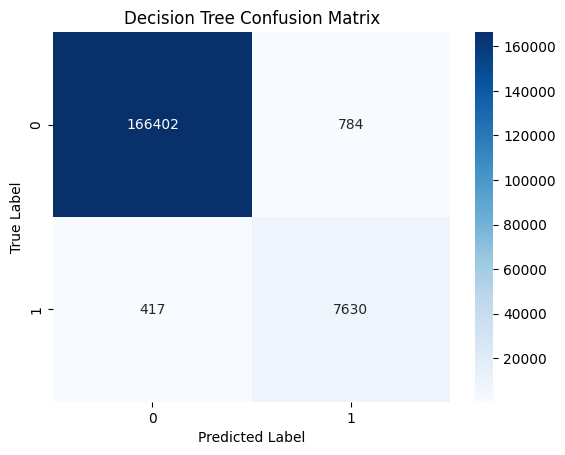

In [166]:
# Create the metrics
cm = confusion_matrix(y_test, dt_predictions)

# Plot the graph
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add title
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Check for high correlations

In [167]:
# Print out the correlations
print(dataset.corr()['Loan_Default_Status'].sort_values(ascending=False))

Loan_Default_Status                        1.000000
Occupation_Professional_Category           0.247478
Number of Days in Debit during Month       0.127962
Gender                                     0.100508
Own_Rent_Home                              0.059299
Type_of_Business_Industry_of_Employment    0.056726
Key                                        0.024045
CRB Score                                  0.015544
Time_at_Current_Employment_(Months)       -0.006982
Number of Cheque Debit Transactions       -0.007895
Number of ATM Deposits                    -0.020409
Age_at_Application                        -0.030747
Number_of_Dependents                      -0.030826
Number of Over the Counter withdrawals    -0.031080
Monthly_Income                            -0.033917
Minimum End of Day Balance                -0.034240
Average Balance                           -0.039460
Sum of Monthly Debit Transactions         -0.041647
Sum of Monthly Credit Transactions        -0.042020
Number of De

Comment:
* If a column has high correlation (close to 1) with the target, drop it.

* Remove Future Data: such as 'contract status' that is closed

In [168]:
# # drop column with a high correlation
# dataset.drop(columns=["Number of Days Past Due","Contract Status"], inplace=True)


In [169]:
# Get target variable
X = dataset.drop('Loan_Default_Status', axis=1)
y = dataset['Loan_Default_Status']

# Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Initializing and training the model
lr_model = LogisticRegression() # max_iter=1000
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    222902
           1       0.36      0.09      0.15     10742

    accuracy                           0.95    233644
   macro avg       0.66      0.54      0.56    233644
weighted avg       0.93      0.95      0.94    233644

AUC-ROC: 0.91


## Checking Class distribution/checking for class Imbalance

In [170]:
# Check unique values sizes in percentage
print(dataset['Loan_Default_Status'].value_counts(normalize=True)*100)

Loan_Default_Status
0    95.460102
1     4.539898
Name: proportion, dtype: float64


*Observation:* theclass is imbalanced as we have about 95% represented by non defaulters.

Balance the class distribution

In [171]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Let us now re-run the models

In [172]:
# Initializing and training the model after SMOTE
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# Making predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    222902
           1       0.24      0.91      0.38     10742

    accuracy                           0.86    233644
   macro avg       0.62      0.89      0.65    233644
weighted avg       0.96      0.86      0.90    233644

AUC-ROC: 0.93


In [173]:
# Train the model after applying SMOTE

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    222902
           1       0.89      0.97      0.93     10742

    accuracy                           0.99    233644
   macro avg       0.94      0.98      0.96    233644
weighted avg       0.99      0.99      0.99    233644

Accuracy: 0.9932


In [174]:
# Train model after applying SMOTE
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate model
rf_predictions = rf_model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    222902
           1       0.88      0.98      0.93     10742

    accuracy                           0.99    233644
   macro avg       0.94      0.99      0.96    233644
weighted avg       0.99      0.99      0.99    233644



Try XGBoost after applying SMOTE

In [175]:
# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss') # use_label_encoder=False,

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    222902
           1       0.87      1.00      0.93     10742

    accuracy                           0.99    233644
   macro avg       0.94      0.99      0.96    233644
weighted avg       0.99      0.99      0.99    233644



Using feature selection

In [176]:

# chi_selector = SelectKBest(chi2, k=10)
# X_new = chi_selector.fit_transform(X, y)

## Check for model overfitting

In [177]:
from sklearn.model_selection import cross_val_score

# Check Cross-Validation Score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# If cross-validation accuracy drops significantly, your model is overfitting.

Mean CV Accuracy: 0.9440


*Comment:* The model seems not to overfit as the CV score difference from the accuracy score

## Model Fine-tuning

From the analysis above, The RF model has the best **F1-score** with **$macro$** **$avg$** of **$0.83$** while XGBost model has $0.82$

So we can fine tune the RF model.

In [178]:
# # Define the hyperparameter grid
# rf_param_grid = {
#     'n_estimators': [100, 300, 500, 700],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Perform Randomized Search
# rf_random_search = RandomizedSearchCV(
#     rf_model, param_distributions=rf_param_grid,
#     n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='f1'
# )

# # Fit on training data
# rf_random_search.fit(X_train, y_train)

# # Best RF parameters
# print("Best RF Parameters:", rf_random_search.best_params_)

# # Use best model
# best_rf_model = rf_random_search.best_estimator_

# # Evaluate on test data
# rf_predictions = best_rf_model.predict(X_test)

In [179]:
# # Check accuracy for tuned model
# accuracy = accuracy_score(y_test, rf_predictions)
# report = classification_report(y_test, rf_predictions)

# # Print results for tuned model
# print(f"Accuracy: {accuracy:.2f}")
# print("RF_tuned Classification Report:\n", report)